In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
# Load in the dataframe from project part 1 as basics:
df = pd.read_csv('Data/combined_tmdb_data.csv.gz')
df.head()

imdb_id  adult                     backdrop_path belongs_to_collection  \
0  tt0312305    0.0  /lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg                   NaN   
1  tt0326965    0.0  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg                   NaN   
2  tt0331312    0.0                               NaN                   NaN   
3  tt0393049    0.0  /gc9FN5zohhzCt05RkejQIIPLtBl.jpg                   NaN   
4  tt0398286    0.0  /cWczNud8Y8i8ab0Z4bxos4myWYO.jpg                   NaN   

        budget                                             genres  \
0          0.0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1          0.0  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
2          0.0                                                 []   
3     300000.0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
4  260000000.0  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   

                                       homepage        id original_language  \
0                    http://www.qqthemovie.com/   23738.0                en   
1                      http://www.inmysleep.com   40048.0                en   
2                                           NaN  214026.0                en   
3                                           NaN  324352.0                en   
4  http://disney.go.com/disneypictures/tangled/   38757.0                en   

                           original_title  \
0  Quantum Quest: A Cassini Space Odyssey   
1                             In My Sleep   
2                      This Wretched Life   
3                        Anderson's Cross   
4                                 Tangled   

                                            overview  popularity  \
0  Dave, a young photon, who is forced out of the...       1.619   
1  A sleepwalking, sexaholic masseur wakes up, co...       3.755   
2  Awakening from a near fatal overdose, Chris em...       0.622   
3  Nick Anderson, Kevin Daniels, and Tracey Green...       1.576   
4  When the kingdom's most wanted-and most charmi...     108.562   

                        poster_path  \
0  /uneDCn8y6RHKc5IAfpgznmaan9I.jpg   
1  /sv9o6VYUQM2AbfmlTwDTn9238R5.jpg   
2  /xMMehQD3VWgorYoqvlTeQXSbsFo.jpg   
3  /2j90os0c2HJuIjWXxMg9vMvOliw.jpg   
4  /ym7Kst6a4uodryxqbGOxmewF235.jpg   

                                production_companies  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [{'id': 46102, 'logo_path': None, 'name': 'Ill...   
4  [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2012-12-02   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2010-04-23   
2                                                 []   2010-01-01   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2010-05-20   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2010-11-24   

       revenue  runtime                                   spoken_languages  \
0          0.0     45.0  [{'english_name': 'English', 'iso_639_1': 'en'...   
1          0.0     90.0  [{'english_name': 'English', 'iso_639_1': 'en'...   
2          0.0      0.0                                                 []   
3          0.0     98.0  [{'english_name': 'English', 'iso_639_1': 'en'...   
4  592461732.0    100.0  [{'english_name': 'English', 'iso_639_1': 'en'...   

     status                                            tagline  \
0  Released                                                NaN   
1  Released                        Sleepwalking can be deadly.   
2  Released                                                NaN   
3  Released  Sometimes the boy next door is more than the b...   
4  Released           They're taking adventure to new lengths.   

                                    title  video  vote_average  vote_count  \
0  Quantum Quest: A Cassini S

# Preprocessing

In [4]:
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage',
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

imdb_id  adult belongs_to_collection       budget  \
0      tt0312305    0.0                   NaN          0.0   
1      tt0326965    0.0                   NaN          0.0   
2      tt0331312    0.0                   NaN          0.0   
3      tt0393049    0.0                   NaN     300000.0   
4      tt0398286    0.0                   NaN  260000000.0   
...          ...    ...                   ...          ...   
38131  tt9906644    0.0                   NaN          0.0   
38132  tt9913660    0.0                   NaN          0.0   
38133  tt9913872    0.0                   NaN          0.0   
38134  tt9914942    0.0                   NaN          0.0   
38135  tt9915872    0.0                   NaN          0.0   

                                                  genres  popularity  \
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...       1.619   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...       3.755   
2                                                     []       0.622   
3      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...       1.576   
4      [{'id': 16, 'name': 'Animation'}, {'id': 10751...     108.562   
...                                                  ...         ...   
38131  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...       1.448   
38132                      [{'id': 18, 'name': 'Drama'}]       0.638   
38133                     [{'id': 27, 'name': 'Horror'}]       0.600   
38134  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...       5.570   
38135                                                 []       0.600   

                                    production_companies release_date  \
0                                                     []   2012-12-02   
1                                                     []   2010-04-23   
2                                                     []   2010-01-01   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...   2010-05-20   
4      [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...   2010-11-24   
...                                                  ...          ...   
38131  [{'id': 125107, 'logo_path': None, 'name': 'Ch...   2019-09-27   
38132                                                 []   2019-10-23   
38133                                                 []   2019-01-01   
38134  [{'id': 20786, 'logo_path': None, 'name': "Mas...   2019-07-12   
38135                                                 []          NaN   

           revenue  runtime    status                                   title  \
0              0.0     45.0  Released  Quantum Quest: A Cassini Space Odyssey   
1              0.0     90.0  Released                             In My Sleep   
2              0.0      0.0  Released                      This Wretched Life   
3              0.0     98.0  Released                        Anderson's Cross   
4      592461732.0    100.0  Released                                 Tangled   
...            ...      ...       ...                                     ...   
38131          0.0    122.0  Released                               Manoharam   
38132          0.0    102.0  Released                              No Apology   
38133          0.0      0.0  Released                   De la piel del Diablo   
38134          0.0     74.0  Released                  Life without Sara Amat   
38135          0.0     97.0  Released                    The Last White Witch   

       vote_average  vote_count certification\r  
0             7.900         8.0              \r  
1             5.500        31.0         PG-13\r  
2             5.000         1.0              \r  
3             4.000         5.0              \r  
4             7.590     10223.0            PG\r  
...             ...         ...             ...  
38131         6.125        12.0              \r  
38132         8.000         1.0              \r  
38133         8.200         3.0              \r  
38134         7.700         7.0              \r  

In [5]:
df['belongs_to_collection'].value_counts()

{'id': 39199, 'name': 'Detective Conan Collection', 'poster_path': '/bV6EHK0Q65hHKSoVDeACbc960jQ.jpg', 'backdrop_path': '/mwz7lYimh8da0zZHOI41xNd86yH.jpg'}    9
{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}          8
{'id': 803526, 'name': 'Super Sentai Collection', 'poster_path': '/jIbtHH6ZGq4KNpiWRUajNIuiIxn.jpg', 'backdrop_path': None}                                    7
{'id': 101646, 'name': 'Vares Collection', 'poster_path': None, 'backdrop_path': None}                                                                         7
{'id': 725456, 'name': 'American Poltergeist', 'poster_path': '/blYngKjIj7FqxovoDbXwtbmJ8WF.jpg', 'backdrop_path': None}                                       7
                                                                                                                                                              ..
{'id': 448758, 'name': 'Børning Co

In [6]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

2499

In [7]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    35637
True      2499
Name: belongs_to_collection, dtype: int64

In [8]:
df['genres'][0]

"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 878, 'name': 'Science Fiction'}]"

In [9]:
## Function to get just the genre names as a list 
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [10]:
## Use our function and exploding the new column
get_genre_name(df.loc[0,'genres'])

['Family', 'Animation', 'Science Fiction']

In [11]:
## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

imdb_id  adult  belongs_to_collection  budget  \
0  tt0312305    0.0                  False     0.0   
0  tt0312305    0.0                  False     0.0   
0  tt0312305    0.0                  False     0.0   
1  tt0326965    0.0                  False     0.0   
1  tt0326965    0.0                  False     0.0   

                                              genres  popularity  \
0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...       1.619   
0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...       1.619   
0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...       1.619   
1  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...       3.755   
1  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...       3.755   

  production_companies release_date  revenue  runtime    status  \
0                   []   2012-12-02      0.0     45.0  Released   
0                   []   2012-12-02      0.0     45.0  Released   
0                   []   2012-12-02      0.0     45.0  Released   
1                   []   2010-04-23      0.0     90.0  Released   
1                   []   2010-04-23      0.0     90.0  Released   

                                    title  vote_average  vote_count  \
0  Quantum Quest: A Cassini Space Odyssey           7.9         8.0   
0  Quantum Quest: A Cassini Space Odyssey           7.9         8.0   
0  Quantum Quest: A Cassini Space Odyssey           7.9         8.0   
1                             In My Sleep           5.5        31.0   
1                             In My Sleep           5.5        31.0   

  certification\r      genres_list  
0              \r           Family  
0              \r        Animation  
0              \r  Science Fiction  
1         PG-13\r         Thriller  
1         PG-13\r          Mystery

In [12]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Family', 'Animation', 'Science Fiction', 'Thriller', 'Mystery',
       'Drama', 'Romance', 'Comedy', 'War', 'Crime', 'Action',
       'Adventure', 'Horror', 'Fantasy', 'History', 'Western', 'Music',
       'Documentary', 'TV Movie'], dtype=object)

In [13]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df.head()

imdb_id  adult  belongs_to_collection       budget  \
0  tt0312305    0.0                  False          0.0   
1  tt0326965    0.0                  False          0.0   
2  tt0331312    0.0                  False          0.0   
3  tt0393049    0.0                  False     300000.0   
4  tt0398286    0.0                  False  260000000.0   

                                              genres  popularity  \
0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...       1.619   
1  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...       3.755   
2                                                 []       0.622   
3  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...       1.576   
4  [{'id': 16, 'name': 'Animation'}, {'id': 10751...     108.562   

                                production_companies release_date  \
0                                                 []   2012-12-02   
1                                                 []   2010-04-23   
2                                                 []   2010-01-01   
3  [{'id': 46102, 'logo_path': None, 'name': 'Ill...   2010-05-20   
4  [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...   2010-11-24   

       revenue  runtime    status                                   title  \
0          0.0     45.0  Released  Quantum Quest: A Cassini Space Odyssey   
1          0.0     90.0  Released                             In My Sleep   
2          0.0      0.0  Released                      This Wretched Life   
3          0.0     98.0  Released                        Anderson's Cross   
4  592461732.0    100.0  Released                                 Tangled   

   vote_average  vote_count certification\r  \
0          7.90         8.0              \r   
1          5.50        31.0         PG-13\r   
2          5.00         1.0              \r   
3          4.00         5.0              \r   
4          7.59     10223.0            PG\r   

                            genres_list  Genre_Family  Genre_Animation  \
0  [Family, Animation, Science Fiction]          True             True   
1            [Thriller, Mystery, Drama]         False            False   
2                                    []         False            False   
3              [Romance, Comedy, Drama]         False            False   
4                   [Animation, Family]          True             True   

   Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                   True           False          False        False   
1                  False            True           True         True   
2                  False           False          False        False   
3                  False           False          False         True   
4                  False           False          False        False   

   Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  Genre_Action  \
0          False         False      False        False         False   
1          False         False      False        False         False   
2          False         False      False        False         False   
3           True          True      False        False         False   
4          False         False      False        False         False   

   Genre_Adventure  Genre_Horror  Genre_Fantasy  Genre_History  Genre_Western  \
0            False         False          False          False          False   
1            False         False          False          False          False   
2            False         False          False          False          False   
3            False         False          False          False          False   
4            False         False          False          False          False   

   Genre_Music  Genre_Documentary  Genre_TV Movie  
0        False              False           False  
1        False              False           False  
2        False              False           False  
3        False              False           False  
4        False        

In [14]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

imdb_id  adult  belongs_to_collection       budget  \
0      tt0312305    0.0                  False          0.0   
1      tt0326965    0.0                  False          0.0   
2      tt0331312    0.0                  False          0.0   
3      tt0393049    0.0                  False     300000.0   
4      tt0398286    0.0                  False  260000000.0   
...          ...    ...                    ...          ...   
38131  tt9906644    0.0                  False          0.0   
38132  tt9913660    0.0                  False          0.0   
38133  tt9913872    0.0                  False          0.0   
38134  tt9914942    0.0                  False          0.0   
38135  tt9915872    0.0                  False          0.0   

                                                  genres  popularity  \
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...       1.619   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...       3.755   
2                                                     []       0.622   
3      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...       1.576   
4      [{'id': 16, 'name': 'Animation'}, {'id': 10751...     108.562   
...                                                  ...         ...   
38131  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...       1.448   
38132                      [{'id': 18, 'name': 'Drama'}]       0.638   
38133                     [{'id': 27, 'name': 'Horror'}]       0.600   
38134  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...       5.570   
38135                                                 []       0.600   

                                    production_companies release_date  \
0                                                     []   2012-12-02   
1                                                     []   2010-04-23   
2                                                     []   2010-01-01   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...   2010-05-20   
4      [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...   2010-11-24   
...                                                  ...          ...   
38131  [{'id': 125107, 'logo_path': None, 'name': 'Ch...   2019-09-27   
38132                                                 []   2019-10-23   
38133                                                 []   2019-01-01   
38134  [{'id': 20786, 'logo_path': None, 'name': "Mas...   2019-07-12   
38135                                                 []          NaN   

           revenue  runtime                                   title  \
0              0.0     45.0  Quantum Quest: A Cassini Space Odyssey   
1              0.0     90.0                             In My Sleep   
2              0.0      0.0                      This Wretched Life   
3              0.0     98.0                        Anderson's Cross   
4      592461732.0    100.0                                 Tangled   
...            ...      ...                                     ...   
38131          0.0    122.0                               Manoharam   
38132          0.0    102.0                              No Apology   
38133          0.0      0.0                   De la piel del Diablo   
38134          0.0     74.0                  Life without Sara Amat   
38135          0.0     97.0                    The Last White Witch   

       vote_average  vote_count certification\r  \
0             7.900         8.0              \r   
1             5.500        31.0         PG-13\r   
2             5.000         1.0              \r   
3             4.000         5.0              \r   
4             7.590     10223.0            PG\r   
...             ...         ...             ...   
38131         6.125        12.0              \r   
38132         8.000         1.0              \r   
38133         8.200         3.0              \r   
38134         7.700         7.0              \r   
38135         0.000         0.0              \r   

                                genres_list 

In [15]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

imdb_id  adult  belongs_to_collection       budget  \
4      tt0398286    0.0                  False  260000000.0   
6      tt0411951    0.0                   True   30000000.0   
9      tt0427152    0.0                  False   69000000.0   
10     tt0429493    0.0                  False  110000000.0   
11     tt0435761    0.0                   True  200000000.0   
...          ...    ...                    ...          ...   
37700  tt9537346    0.0                   True    1066375.0   
37706  tt9541602    0.0                  False    8120000.0   
37728  tt9564774    0.0                  False    3500000.0   
37949  tt9764654    0.0                  False   12547000.0   
38089  tt9877340    0.0                  False     632040.0   

                                                  genres  popularity  \
4      [{'id': 16, 'name': 'Animation'}, {'id': 10751...     108.562   
6      [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      21.896   
9                         [{'id': 35, 'name': 'Comedy'}]      13.637   
10     [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...      31.075   
11     [{'id': 16, 'name': 'Animation'}, {'id': 10751...      49.445   
...                                                  ...         ...   
37700                      [{'id': 18, 'name': 'Drama'}]       1.400   
37706  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...      16.561   
37728  [{'id': 10751, 'name': 'Family'}, {'id': 35, '...       1.896   
37949                      [{'id': 18, 'name': 'Drama'}]       4.748   
38089                      [{'id': 18, 'name': 'Drama'}]       0.924   

                                    production_companies release_date  \
4      [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...   2010-11-24   
6      [{'id': 5882, 'logo_path': None, 'name': 'Namc...   2010-03-20   
9      [{'id': 2242, 'logo_path': None, 'name': 'Ever...   2010-07-30   
10     [{'id': 10908, 'logo_path': None, 'name': 'Pho...   2010-06-09   
11     [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...   2010-06-16   
...                                                  ...          ...   
37700  [{'id': 86601, 'logo_path': None, 'name': 'Hum...   2019-07-19   
37706  [{'id': 7036, 'logo_path': '/javbyY0ZCvlFJtly3...   2019-01-23   
37728  [{'id': 44161, 'logo_path': '/tQ3Kj23ep0PN3HsH...   2019-12-13   
37949  [{'id': 113206, 'logo_path': '/wnsT1H4ofxm3YOO...   2019-02-27   
38089  [{'id': 179765, 'logo_path': None, 'name': 'Si...   2019-11-08   

            revenue  runtime                         title  vote_average  \
4      5.924617e+08    100.0                       Tangled         7.590   
6      9.670000e+05     92.0                        Tekken         5.368   
9      8.638786e+07    114.0           Dinner for Schmucks         5.692   
10     1.772388e+08    117.0                    The A-Team         6.393   
11     1.066970e+09    103.0                   Toy Story 3         7.792   
...             ...      ...                           ...           ...   
37700  4.165528e+06    140.0                 Ardaas Karaan         6.000   
37706  1.246522e+08    111.0                   Extreme Job         7.012   
37728  1.000000e+07    149.0                    Venky Mama         4.125   
37949  1.091477e+06    116.0  Race to Freedom: Um Bok-dong         6.800   
38089  4.220000e+04    134.0                 Nalpathiyonnu         6.500   

       vote_count certification\r  \
4         10223.0            PG\r   
6           600.0             R\r   
9          1601.0         PG-13\r   
10         4206.0         PG-13\r   
11        13435.0             G\r   
...           ...             ...   
37700         3.0              \r   
37706       215.0              \r   
37728         8.0              \r   
37949        11.0              \r   
38089         2.0              \r   

                                             genres_list  Genre_Family  \
4                                    [Animation, Family]          True   
6   

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 4 to 38089
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2816 non-null   object 
 1   adult                  2816 non-null   float64
 2   belongs_to_collection  2816 non-null   bool   
 3   budget                 2816 non-null   float64
 4   genres                 2816 non-null   object 
 5   popularity             2816 non-null   float64
 6   production_companies   2816 non-null   object 
 7   release_date           2809 non-null   object 
 8   revenue                2816 non-null   float64
 9   runtime                2816 non-null   float64
 10  title                  2816 non-null   object 
 11  vote_average           2816 non-null   float64
 12  vote_count             2816 non-null   float64
         2816 non-null   object 
 14  genres_list            2816 non-null   object 
 15  Genre_Family          

In [17]:
df.rename(columns = {'certification\r':'certification'}, inplace=True)

C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\1908602132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'certification\r':'certification'}, inplace=True)


In [18]:
df['certification'].value_counts()

R\r        880
\r         798
PG-13\r    723
PG\r       282
NR\r        95
G\r         30
NC-17\r      8
Name: certification, dtype: int64

In [19]:
df['certification'] = df['certification'].str.replace('\r','')

C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\3779329800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['certification'] = df['certification'].str.replace('\r','')


In [20]:
df['certification'].value_counts()

R        880
         798
PG-13    723
PG       282
NR        95
G         30
NC-17      8
Name: certification, dtype: int64

In [21]:
## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '':np.nan,
             '10':np.nan,}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\2728476978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['certification'] = df['certification'].replace(repl_cert)


R        880
NaN      798
PG-13    723
PG       282
NR        95
G         30
NC-17      8
Name: certification, dtype: int64

In [22]:
## split release date into 3 columns
df['release_date'].value_counts()

2011-09-09    10
2011-09-30     9
2014-12-25     7
2016-10-07     7
2010-02-26     7
              ..
2014-09-03     1
2014-03-28     1
2014-10-20     1
2014-01-29     1
2019-01-23     1
Name: release_date, Length: 1577, dtype: int64

In [23]:
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\1575767540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_cols] = df['release_date'].str.split('-',expand=True)
C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\1575767540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_cols] = df['release_date'].str.split('-',expand=True)
C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\1575767540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

imdb_id  adult  belongs_to_collection       budget  \
4      tt0398286    0.0                  False  260000000.0   
6      tt0411951    0.0                   True   30000000.0   
9      tt0427152    0.0                  False   69000000.0   
10     tt0429493    0.0                  False  110000000.0   
11     tt0435761    0.0                   True  200000000.0   
...          ...    ...                    ...          ...   
37700  tt9537346    0.0                   True    1066375.0   
37706  tt9541602    0.0                  False    8120000.0   
37728  tt9564774    0.0                  False    3500000.0   
37949  tt9764654    0.0                  False   12547000.0   
38089  tt9877340    0.0                  False     632040.0   

                                                  genres  popularity  \
4      [{'id': 16, 'name': 'Animation'}, {'id': 10751...     108.562   
6      [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      21.896   
9                         [{'id': 35, 'name': 'Comedy'}]      13.637   
10     [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...      31.075   
11     [{'id': 16, 'name': 'Animation'}, {'id': 10751...      49.445   
...                                                  ...         ...   
37700                      [{'id': 18, 'name': 'Drama'}]       1.400   
37706  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...      16.561   
37728  [{'id': 10751, 'name': 'Family'}, {'id': 35, '...       1.896   
37949                      [{'id': 18, 'name': 'Drama'}]       4.748   
38089                      [{'id': 18, 'name': 'Drama'}]       0.924   

                                    production_companies release_date  \
4      [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...   2010-11-24   
6      [{'id': 5882, 'logo_path': None, 'name': 'Namc...   2010-03-20   
9      [{'id': 2242, 'logo_path': None, 'name': 'Ever...   2010-07-30   
10     [{'id': 10908, 'logo_path': None, 'name': 'Pho...   2010-06-09   
11     [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...   2010-06-16   
...                                                  ...          ...   
37700  [{'id': 86601, 'logo_path': None, 'name': 'Hum...   2019-07-19   
37706  [{'id': 7036, 'logo_path': '/javbyY0ZCvlFJtly3...   2019-01-23   
37728  [{'id': 44161, 'logo_path': '/tQ3Kj23ep0PN3HsH...   2019-12-13   
37949  [{'id': 113206, 'logo_path': '/wnsT1H4ofxm3YOO...   2019-02-27   
38089  [{'id': 179765, 'logo_path': None, 'name': 'Si...   2019-11-08   

            revenue  runtime                         title  vote_average  \
4      5.924617e+08    100.0                       Tangled         7.590   
6      9.670000e+05     92.0                        Tekken         5.368   
9      8.638786e+07    114.0           Dinner for Schmucks         5.692   
10     1.772388e+08    117.0                    The A-Team         6.393   
11     1.066970e+09    103.0                   Toy Story 3         7.792   
...             ...      ...                           ...           ...   
37700  4.165528e+06    140.0                 Ardaas Karaan         6.000   
37706  1.246522e+08    111.0                   Extreme Job         7.012   
37728  1.000000e+07    149.0                    Venky Mama         4.125   
37949  1.091477e+06    116.0  Race to Freedom: Um Bok-dong         6.800   
38089  4.220000e+04    134.0                 Nalpathiyonnu         6.500   

       vote_count certification  \
4         10223.0            PG   
6           600.0             R   
9          1601.0         PG-13   
10         4206.0         PG-13   
11        13435.0             G   
...           ...           ...   
37700         3.0           NaN   
37706       215.0           NaN   
37728         8.0           NaN   
37949        11.0           NaN   
38089         2.0           NaN   

                                             genres_list  Genre_Family  \
4                                    [Animation, Family]          True   
6      [Crime, Drama, Action

In [24]:
## drop original feature
df = df.drop(columns=['release_date'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 4 to 38089
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2816 non-null   object 
 1   adult                  2816 non-null   float64
 2   belongs_to_collection  2816 non-null   bool   
 3   budget                 2816 non-null   float64
 4   genres                 2816 non-null   object 
 5   popularity             2816 non-null   float64
 6   production_companies   2816 non-null   object 
 7   revenue                2816 non-null   float64
 8   runtime                2816 non-null   float64
 9   title                  2816 non-null   object 
 10  vote_average           2816 non-null   float64
 11  vote_count             2816 non-null   float64
 12  certification          2018 non-null   object 
 13  genres_list            2816 non-null   object 
 14  Genre_Family           2816 non-null   bool   
 15  Gen

In [26]:
df['production_companies']

4        [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...
6        [{'id': 5882, 'logo_path': None, 'name': 'Namc...
9        [{'id': 2242, 'logo_path': None, 'name': 'Ever...
10       [{'id': 10908, 'logo_path': None, 'name': 'Pho...
11       [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...
                               ...                        
37700    [{'id': 86601, 'logo_path': None, 'name': 'Hum...
37706    [{'id': 7036, 'logo_path': '/javbyY0ZCvlFJtly3...
37728    [{'id': 44161, 'logo_path': '/tQ3Kj23ep0PN3HsH...
37949    [{'id': 113206, 'logo_path': '/wnsT1H4ofxm3YOO...
38089    [{'id': 179765, 'logo_path': None, 'name': 'Si...
Name: production_companies, Length: 2816, dtype: object

In [27]:
drop_for_model = ['title','imdb_id','production_companies', 'genres_list', 'genres']
df = df.drop(columns=drop_for_model)
df

adult  belongs_to_collection       budget  popularity       revenue  \
4        0.0                  False  260000000.0     108.562  5.924617e+08   
6        0.0                   True   30000000.0      21.896  9.670000e+05   
9        0.0                  False   69000000.0      13.637  8.638786e+07   
10       0.0                  False  110000000.0      31.075  1.772388e+08   
11       0.0                   True  200000000.0      49.445  1.066970e+09   
...      ...                    ...          ...         ...           ...   
37700    0.0                   True    1066375.0       1.400  4.165528e+06   
37706    0.0                  False    8120000.0      16.561  1.246522e+08   
37728    0.0                  False    3500000.0       1.896  1.000000e+07   
37949    0.0                  False   12547000.0       4.748  1.091477e+06   
38089    0.0                  False     632040.0       0.924  4.220000e+04   

       runtime  vote_average  vote_count certification  Genre_Family  \
4        100.0         7.590     10223.0            PG          True   
6         92.0         5.368       600.0             R         False   
9        114.0         5.692      1601.0         PG-13         False   
10       117.0         6.393      4206.0         PG-13         False   
11       103.0         7.792     13435.0             G          True   
...        ...           ...         ...           ...           ...   
37700    140.0         6.000         3.0           NaN         False   
37706    111.0         7.012       215.0           NaN         False   
37728    149.0         4.125         8.0           NaN          True   
37949    116.0         6.800        11.0           NaN         False   
38089    134.0         6.500         2.0           NaN         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
11                True                  False           False          False   
...                ...                    ...             ...            ...   
37700            False                  False           False          False   
37706            False                  False           False          False   
37728            False                  False           False          False   
37949            False                  False           False          False   
38089            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
11           False          False          True      False        False   
...            ...            ...           ...        ...          ...   
37700         True          False         False      False        False   
37706        False          False          True      False         True   
37728         True          False          True      False        False   
37949         True          False         False      False        False   
38089         True          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False  

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 4 to 38089
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2816 non-null   float64
 1   belongs_to_collection  2816 non-null   bool   
 2   budget                 2816 non-null   float64
 3   popularity             2816 non-null   float64
 4   revenue                2816 non-null   float64
 5   runtime                2816 non-null   float64
 6   vote_average           2816 non-null   float64
 7   vote_count             2816 non-null   float64
 8   certification          2018 non-null   object 
 9   Genre_Family           2816 non-null   bool   
 10  Genre_Animation        2816 non-null   bool   
 11  Genre_Science Fiction  2816 non-null   bool   
 12  Genre_Thriller         2816 non-null   bool   
 13  Genre_Mystery          2816 non-null   bool   
 14  Genre_Drama            2816 non-null   bool   
 15  Gen

# Predictive Models

In [29]:
## Make x and y variables
y = df['revenue'].copy()
X = df.drop(columns=['revenue']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
X_train.head()

adult  belongs_to_collection       budget  popularity  runtime  \
10831    0.0                   True    4900000.0       2.176    137.0   
27180    0.0                  False    1000000.0       5.398    141.0   
240      0.0                  False    5000000.0       7.558     96.0   
3889     0.0                  False   10000000.0      10.659    102.0   
24815    0.0                   True  200000000.0     600.122    137.0   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
10831         4.800        29.0           NaN         False            False   
27180         7.500        40.0         PG-13         False            False   
240           4.400       107.0             R         False            False   
3889          6.514      1238.0             R         False            False   
24815         7.625     19687.0         PG-13         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
10831                  False           False          False        False   
27180                  False           False          False         True   
240                    False            True          False        False   
3889                   False            True          False         True   
24815                   True           False          False        False   

       Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  Genre_Action  \
10831           True          True      False        False         False   
27180          False          True      False        False         False   
240            False         False      False        False         False   
3889           False         False      False         True         False   
24815          False          True      False        False          True   

       Genre_Adventure  Genre_Horror  Genre_Fantasy  Genre_History  \
10831            False         False          False          False   
27180            False         False          False          False   
240              False          True          False          False   
3889             False         False          False          False   
24815             True         False          False          False   

       Genre_Western  Genre_Music  Genre_Documentary  Genre_TV Movie    year  \
10831          False        False              False           False  2013.0   
27180          False        False              False           False  2017.0   
240            False        False              False           False  2010.0   
3889           False        False              False           False  2011.0   
24815          False        False              False           False  2017.0   

       month   day  
10831    9.0  13.0  
27180    1.0  31.0  
240     10.0   1.0  
3889     9.0  10.0  
24815    4.0  19.0

In [30]:
X_train.isna().sum()

adult                      0
belongs_to_collection      0
budget                     0
popularity                 0
runtime                    0
vote_average               0
vote_count                 0
certification            600
Genre_Family               0
Genre_Animation            0
Genre_Science Fiction      0
Genre_Thriller             0
Genre_Mystery              0
Genre_Drama                0
Genre_Romance              0
Genre_Comedy               0
Genre_War                  0
Genre_Crime                0
Genre_Action               0
Genre_Adventure            0
Genre_Horror               0
Genre_Fantasy              0
Genre_History              0
Genre_Western              0
Genre_Music                0
Genre_Documentary          0
Genre_TV Movie             0
year                       7
month                      7
day                        7
dtype: int64

In [31]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [32]:

## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [33]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Family',
 'Genre_Animation',
 'Genre_Science Fiction',
 'Genre_Thriller',
 'Genre_Mystery',
 'Genre_Drama',
 'Genre_Romance',
 'Genre_Comedy',
 'Genre_War',
 'Genre_Crime',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Horror',
 'Genre_Fantasy',
 'Genre_History',
 'Genre_Western',
 'Genre_Music',
 'Genre_Documentary',
 'Genre_TV Movie']

In [34]:

## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [35]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((num_pipe, num_cols),
                                       (cat_pipe,cat_cols),remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', 'vote_count', 'year', 'month',
                                  'day']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification'])])

In [36]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-2']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [37]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


## Create the empty list
final_features = [*num_cols,*cat_features,*already_ohe_cols]
len(final_features)

36

In [38]:

preprocessor.transform(X_train).shape

(2112, 36)

In [39]:
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

adult       budget  popularity  runtime  vote_average  vote_count  \
10831    0.0    4900000.0       2.176    137.0         4.800        29.0   
27180    0.0    1000000.0       5.398    141.0         7.500        40.0   
240      0.0    5000000.0       7.558     96.0         4.400       107.0   
3889     0.0   10000000.0      10.659    102.0         6.514      1238.0   
24815    0.0  200000000.0     600.122    137.0         7.625     19687.0   

         year  month   day  certification_G  certification_MISSING  \
10831  2013.0    9.0  13.0              0.0                    1.0   
27180  2017.0    1.0  31.0              0.0                    0.0   
240    2010.0   10.0   1.0              0.0                    0.0   
3889   2011.0    9.0  10.0              0.0                    0.0   
24815  2017.0    4.0  19.0              0.0                    0.0   

       certification_NC-17  certification_NR  certification_PG  \
10831                  0.0               0.0               0.0   
27180                  0.0               0.0               0.0   
240                    0.0               0.0               0.0   
3889                   0.0               0.0               0.0   
24815                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
10831                  0.0              0.0                    1.0   
27180                  1.0              0.0                    0.0   
240                    0.0              1.0                    0.0   
3889                   0.0              1.0                    0.0   
24815                  1.0              0.0                    1.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
10831           0.0              0.0                    0.0             0.0   
27180           0.0              0.0                    0.0             0.0   
240             0.0              0.0                    0.0             1.0   
3889            0.0              0.0                    0.0             1.0   
24815           0.0              0.0                    1.0             0.0   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
10831            0.0          0.0            1.0           1.0        0.0   
27180            0.0          1.0            0.0           1.0        0.0   
240              0.0          0.0            0.0           0.0        0.0   
3889             0.0          1.0            0.0           0.0        0.0   
24815            0.0          0.0            0.0           1.0        0.0   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
10831          0.0           0.0              0.0           0.0   
27180          0.0           0.0              0.0           0.0   
240            0.0           0.0              0.0           1.0   
3889           1.0           0.0              0.0           0.0   
24815          0.0           1.0              1.0           0.0   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
10831            0.0            0.0            0.0          0.0   
27180            0.0            0.0            0.0          0.0   
240              0.0            0.0            0.0          0.0   
3889             0.0            0.0            0.0          0.0   
24815            0.0            0.0            0.0          0.0   

       Genre_Documentary  Genre_TV Movie  
10831                0.0             0.0  
27180                0.0             0.0  
240                  0.0             0.0  
3889                 0.0             0.0  
24815                0.0             0.0

In [40]:
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

adult      budget  popularity  runtime  vote_average  vote_count  \
13288    0.0    500000.0       3.080    105.0         7.300         3.0   
24481    0.0   5400000.0      12.517    110.0         6.500       383.0   
9        0.0  69000000.0      13.637    114.0         5.692      1601.0   
31910    0.0   1500000.0       2.729    155.0         7.400        19.0   
1684     0.0     10000.0       0.600     90.0         0.000         0.0   

         year  month   day  certification_G  certification_MISSING  \
13288  2014.0    6.0   6.0              0.0                    1.0   
24481  2017.0   11.0  10.0              0.0                    1.0   
9      2010.0    7.0  30.0              0.0                    0.0   
31910  2018.0    7.0  20.0              0.0                    0.0   
1684   2010.0   10.0  20.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
13288                  0.0               0.0               0.0   
24481                  0.0               0.0               0.0   
9                      0.0               0.0               0.0   
31910                  0.0               0.0               0.0   
1684                   0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
13288                  0.0              0.0                    0.0   
24481                  0.0              0.0                    0.0   
9                      1.0              0.0                    0.0   
31910                  1.0              0.0                    0.0   
1684                   0.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
13288           1.0              0.0                    0.0             0.0   
24481           0.0              0.0                    0.0             0.0   
9               0.0              0.0                    0.0             0.0   
31910           0.0              0.0                    0.0             0.0   
1684            0.0              0.0                    0.0             0.0   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
13288            0.0          1.0            1.0           0.0        0.0   
24481            0.0          1.0            0.0           0.0        0.0   
9                0.0          0.0            0.0           1.0        0.0   
31910            0.0          1.0            0.0           1.0        0.0   
1684             0.0          1.0            0.0           0.0        0.0   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
13288          0.0           0.0              0.0           0.0   
24481          0.0           0.0              0.0           0.0   
9              0.0           0.0              0.0           0.0   
31910          1.0           1.0              0.0           0.0   
1684           0.0           0.0              0.0           0.0   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
13288            0.0            0.0            0.0          0.0   
24481            0.0            0.0            0.0          0.0   
9                0.0            0.0            0.0          0.0   
31910            0.0            0.0            0.0          0.0   
1684             0.0            0.0            0.0          0.0   

       Genre_Documentary  Genre_TV Movie  
13288                0.0             0.0  
24481                0.0             0.0  
9                    0.0             0.0  
31910                0.0             0.0  
1684                 0.0             0.0

In [41]:
##import statsmodels correctly
import statsmodels.api as sm

In [42]:

## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
display(X_train_df.head(2),X_test_df.head(2))

adult     budget  popularity  runtime  vote_average  vote_count  \
10831    0.0  4900000.0       2.176    137.0           4.8        29.0   
27180    0.0  1000000.0       5.398    141.0           7.5        40.0   

         year  month   day  certification_G  certification_MISSING  \
10831  2013.0    9.0  13.0              0.0                    1.0   
27180  2017.0    1.0  31.0              0.0                    0.0   

       certification_NC-17  certification_NR  certification_PG  \
10831                  0.0               0.0               0.0   
27180                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
10831                  0.0              0.0                    1.0   
27180                  1.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
10831           0.0              0.0                    0.0             0.0   
27180           0.0              0.0                    0.0             0.0   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
10831            0.0          0.0            1.0           1.0        0.0   
27180            0.0          1.0            0.0           1.0        0.0   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
10831          0.0           0.0              0.0           0.0   
27180          0.0           0.0              0.0           0.0   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
10831            0.0            0.0            0.0          0.0   
27180            0.0            0.0            0.0          0.0   

       Genre_Documentary  Genre_TV Movie  const  
10831                0.0             0.0    1.0  
27180                0.0             0.0    1.0

adult     budget  popularity  runtime  vote_average  vote_count  \
13288    0.0   500000.0       3.080    105.0           7.3         3.0   
24481    0.0  5400000.0      12.517    110.0           6.5       383.0   

         year  month   day  certification_G  certification_MISSING  \
13288  2014.0    6.0   6.0              0.0                    1.0   
24481  2017.0   11.0  10.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
13288                  0.0               0.0               0.0   
24481                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
13288                  0.0              0.0                    0.0   
24481                  0.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
13288           1.0              0.0                    0.0             0.0   
24481           0.0              0.0                    0.0             0.0   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
13288            0.0          1.0            1.0           0.0        0.0   
24481            0.0          1.0            0.0           0.0        0.0   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
13288          0.0           0.0              0.0           0.0   
24481          0.0           0.0              0.0           0.0   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
13288            0.0            0.0            0.0          0.0   
24481            0.0            0.0            0.0          0.0   

       Genre_Documentary  Genre_TV Movie  const  
13288                0.0             0.0    1.0  
24481                0.0             0.0    1.0

# Model Assumptions

In [43]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:01:44   Log-Likelihood:                -41997.
No. Observations:                2112   AIC:                         8.406e+04
Df Residuals:                    2078   BIC:                         8.425e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                  -236.4736     71.424     -3.311      0.001    -376.543     -96.404
budget                    1.8611      0.077     24.122      0.000       1.710       2.012
popularity             1.871e+04   1.27e+05      0.147      0.883    -2.3e+05    2.68e+05
runtime                2.254e+05   1.23e+05      1.827      0.068   -1.66e+04    4.67e+05
vote_average          -2.232e+06   2.08e+06     -1.074      0.283   -6.31e+06    1.84e+06
vote_count             2.782e+04    964.905     28.837      0.000    2.59e+04    2.97e+04
year                   2.735e+06   8.33e+05      3.284      0.001     1.1e+06    4.37e+06
month                 -3.712e+05   6.82e+05     -0.544      0.586   -1.71e+06    9.66e+05
day                    3.438e+05   2.73e+05      1.261      0.208   -1.91e+05    8.79e+05
certification_G        -6.98e+08   2.11e+08     -3.314      0.001   -1.11e+09   -2.85e+08
certification_MISSING -6.819e+08    2.1e+08     -3.244      0.001   -1.09e+09    -2.7e+08
certification_NC-17   -6.905e+08   2.13e+08     -3.239      0.001   -1.11e+09   -2.72e+08
certification_NR       -6.87e+08    2.1e+08     -3.269      0.001    -1.1e+09   -2.75e+08
certification_PG      -6.791e+08    2.1e+08     -3.241      0.001   -1.09e+09   -2.68e+08
certification_PG-13   -7.008e+08   2.09e+08     -3.346      0.001   -1.11e+09    -2.9e+08
certification_R       -7.207e+08   2.09e+08     -3.441      0.001   -1.13e+09    -3.1e+08
belongs_to_collection  6.767e+07   6.26e+06     10.817      0.000    5.54e+07    7.99e+07
Genre_Family           7.305e+05   1.16e+07      0.063      0.950   -2.21e+07    2.35e+07
Genre_Animation        4.616e+07   1.29e+07      3.590      0.000    2.09e+07    7.14e+07
Genre_Science Fiction -3.475e+07   8.91e+06     -3.902      0.000   -5.22e+07   -1.73e+07
Genre_Thriller         1.593e+06   6.38e+06      0.250      0.803   -1.09e+07    1.41e+07
Genre_Mystery         -1.998e+07   9.28e+06     -2.154      0.031   -3.82e+07   -1.79e+06
Genre_Drama           -5.161e+05   6.14e+06     -0.084      0.933   -1.26e+07    1.15e+07
Genre_Romance          9.712e+06   6.94e+06      1.400      0.162    -3.9e+06    2.33e+07
Genre_Comedy           1.016e+06   5.98e+06      0.170      0.865   -1.07e+07    1.27e+07
Genre_War              5.311e+06    1.3e+07      0.410      0.682   -2.01e+07    3.07e+07
Genre_Crime           -6.628e+06   7.52e+06     -0.881      0.378   -2.14e+07    8.12e+06
Genre_Action          -1.223e+07   6.37e+06     -1.921      0.055   -2.47e+07    2.58e+05
Genre_Adventure        1.251e+07   7.69e+06      1.628      0.104   -2.56e+06    2.76e+07
Genre_Horror           1.053e+07   8.93e+06      1.179      0.238   -6.98e+06     2.8e+07
Genre_Fantasy         -4.083e+06   8.31e+06     -0.491      0.623   -2.04e+07    1.22e+07
Genre_History         -

In [44]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.775
Testing R^2: 0.747


# The 4 Assumptions of a Linear Regression are:
* Linearity: That the input features have a linear relationship with the target.
* Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
* Normality: The model's residuals are approximately normally distributed.
* Homoscedasticity: The model residuals have equal variance across all predictions.

# The Assumptions of Linear Regression

QQ-Plot for Checking for Normality

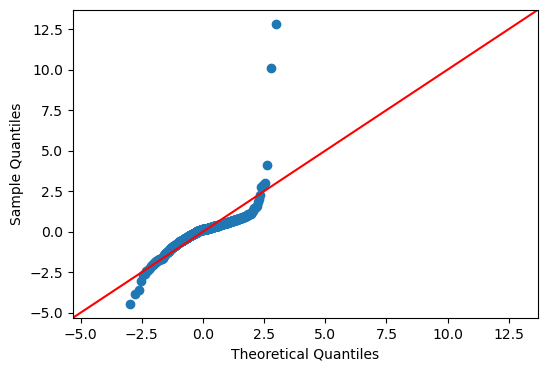

In [45]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

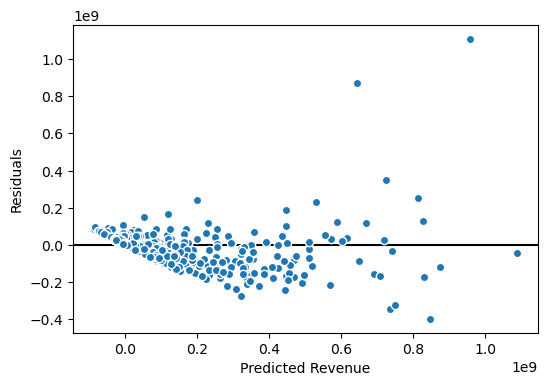

In [46]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

In [47]:
def evaluate_ols(result,X_train_df, y_train, show_summary=True):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    try:
        display(result.summary())
    except:
        pass
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:01:44   Log-Likelihood:                -41997.
No. Observations:                2112   AIC:                         8.406e+04
Df Residuals:                    2078   BIC:                         8.425e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                  -236.4736     71.424     -3.311      0.001    -376.543     -96.404
budget                    1.8611      0.077     24.122      0.000       1.710       2.012
popularity             1.871e+04   1.27e+05      0.147      0.883    -2.3e+05    2.68e+05
runtime                2.254e+05   1.23e+05      1.827      0.068   -1.66e+04    4.67e+05
vote_average          -2.232e+06   2.08e+06     -1.074      0.283   -6.31e+06    1.84e+06
vote_count             2.782e+04    964.905     28.837      0.000    2.59e+04    2.97e+04
year                   2.735e+06   8.33e+05      3.284      0.001     1.1e+06    4.37e+06
month                 -3.712e+05   6.82e+05     -0.544      0.586   -1.71e+06    9.66e+05
day                    3.438e+05   2.73e+05      1.261      0.208   -1.91e+05    8.79e+05
certification_G        -6.98e+08   2.11e+08     -3.314      0.001   -1.11e+09   -2.85e+08
certification_MISSING -6.819e+08    2.1e+08     -3.244      0.001   -1.09e+09    -2.7e+08
certification_NC-17   -6.905e+08   2.13e+08     -3.239      0.001   -1.11e+09   -2.72e+08
certification_NR       -6.87e+08    2.1e+08     -3.269      0.001    -1.1e+09   -2.75e+08
certification_PG      -6.791e+08    2.1e+08     -3.241      0.001   -1.09e+09   -2.68e+08
certification_PG-13   -7.008e+08   2.09e+08     -3.346      0.001   -1.11e+09    -2.9e+08
certification_R       -7.207e+08   2.09e+08     -3.441      0.001   -1.13e+09    -3.1e+08
belongs_to_collection  6.767e+07   6.26e+06     10.817      0.000    5.54e+07    7.99e+07
Genre_Family           7.305e+05   1.16e+07      0.063      0.950   -2.21e+07    2.35e+07
Genre_Animation        4.616e+07   1.29e+07      3.590      0.000    2.09e+07    7.14e+07
Genre_Science Fiction -3.475e+07   8.91e+06     -3.902      0.000   -5.22e+07   -1.73e+07
Genre_Thriller         1.593e+06   6.38e+06      0.250      0.803   -1.09e+07    1.41e+07
Genre_Mystery         -1.998e+07   9.28e+06     -2.154      0.031   -3.82e+07   -1.79e+06
Genre_Drama           -5.161e+05   6.14e+06     -0.084      0.933   -1.26e+07    1.15e+07
Genre_Romance          9.712e+06   6.94e+06      1.400      0.162    -3.9e+06    2.33e+07
Genre_Comedy           1.016e+06   5.98e+06      0.170      0.865   -1.07e+07    1.27e+07
Genre_War              5.311e+06    1.3e+07      0.410      0.682   -2.01e+07    3.07e+07
Genre_Crime           -6.628e+06   7.52e+06     -0.881      0.378   -2.14e+07    8.12e+06
Genre_Action          -1.223e+07   6.37e+06     -1.921      0.055   -2.47e+07    2.58e+05
Genre_Adventure        1.251e+07   7.69e+06      1.628      0.104   -2.56e+06    2.76e+07
Genre_Horror           1.053e+07   8.93e+06      1.179      0.238   -6.98e+06     2.8e+07
Genre_Fantasy         -4.083e+06   8.31e+06     -0.491      0.623   -2.04e+07    1.22e+07
Genre_History         -

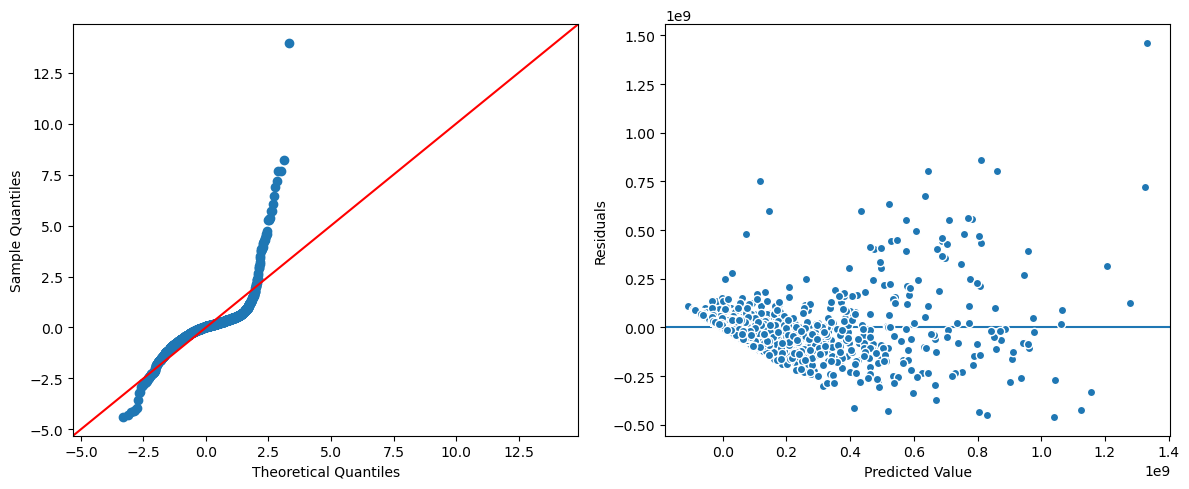

In [48]:
evaluate_ols(result,X_train_df, y_train)

# Improving Our Model:

In [49]:
## reload the data
df = pd.read_csv('Data\combined_tmdb_data.csv.gz')
df.head(2)

imdb_id  adult                     backdrop_path belongs_to_collection  \
0  tt0312305    0.0  /lqUbt2cy2pnqvxKefbQAtxLS0WA.jpg                   NaN   
1  tt0326965    0.0  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg                   NaN   

   budget                                             genres  \
0     0.0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1     0.0  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   

                     homepage       id original_language  \
0  http://www.qqthemovie.com/  23738.0                en   
1    http://www.inmysleep.com  40048.0                en   

                           original_title  \
0  Quantum Quest: A Cassini Space Odyssey   
1                             In My Sleep   

                                            overview  popularity  \
0  Dave, a young photon, who is forced out of the...       1.619   
1  A sleepwalking, sexaholic masseur wakes up, co...       3.755   

                        poster_path production_companies  \
0  /uneDCn8y6RHKc5IAfpgznmaan9I.jpg                   []   
1  /sv9o6VYUQM2AbfmlTwDTn9238R5.jpg                   []   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2012-12-02      0.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2010-04-23      0.0   

   runtime                                   spoken_languages    status  \
0     45.0  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
1     90.0  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   

                       tagline                                   title  video  \
0                          NaN  Quantum Quest: A Cassini Space Odyssey    0.0   
1  Sleepwalking can be deadly.                             In My Sleep    0.0   

   vote_average  vote_count certification\r  
0           7.9         8.0              \r  
1           5.5        31.0         PG-13\r

# Repeating Feature Engineering

In [50]:
## Columns to exclude - Keeping Status and companies
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', #'status','production_companies'
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)

## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()

## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')

## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()

## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    


## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])


#### Fixing Certification
## Checking Certification values
df.rename(columns = {'certification\r':'certification'}, inplace=True)
df['certification'] = df['certification'].str.replace('\r','')
df['certification'].value_counts(dropna=False)
# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)


#### Converting year to sep features
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)

## drop original feature
df = df.drop(columns=['release_date'])
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305    0.0                  False          0.0       1.619   
1      tt0326965    0.0                  False          0.0       3.755   
2      tt0331312    0.0                  False          0.0       0.622   
3      tt0393049    0.0                  False     300000.0       1.576   
4      tt0398286    0.0                  False  260000000.0     108.562   
...          ...    ...                    ...          ...         ...   
38131  tt9906644    0.0                  False          0.0       1.448   
38132  tt9913660    0.0                  False          0.0       0.638   
38133  tt9913872    0.0                  False          0.0       0.600   
38134  tt9914942    0.0                  False          0.0       5.570   
38135  tt9915872    0.0                  False          0.0       0.600   

                                    production_companies      revenue  \
0                                                     []          0.0   
1                                                     []          0.0   
2                                                     []          0.0   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...          0.0   
4      [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...  592461732.0   
...                                                  ...          ...   
38131  [{'id': 125107, 'logo_path': None, 'name': 'Ch...          0.0   
38132                                                 []          0.0   
38133                                                 []          0.0   
38134  [{'id': 20786, 'logo_path': None, 'name': "Mas...          0.0   
38135                                                 []          0.0   

       runtime    status                                   title  \
0         45.0  Released  Quantum Quest: A Cassini Space Odyssey   
1         90.0  Released                             In My Sleep   
2          0.0  Released                      This Wretched Life   
3         98.0  Released                        Anderson's Cross   
4        100.0  Released                                 Tangled   
...        ...       ...                                     ...   
38131    122.0  Released                               Manoharam   
38132    102.0  Released                              No Apology   
38133      0.0  Released                   De la piel del Diablo   
38134     74.0  Released                  Life without Sara Amat   
38135     97.0  Released                    The Last White Witch   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
0             7.900         8.0                        True             True   
1             5.500        31.0         PG-13         False            False   
2             5.000         1.0                       False            False   
3             4.000         5.0                       False            False   
4             7.590     10223.0            PG          True             True   
...             ...         ...           ...           ...              ...   
38131         6.125        12.0                       False            False   
38132         8.000         1.0                       False            False   
38133         8.200         3.0                       False            False   
38134         7.700         7.0                       False            False   
38135         0.000         0.0                       False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False           False          False        False 

# Filtering
* Make sure to only keep:
 - Status=Released.
 - Budget >0
 - Revenue >0

In [51]:
## Check status
df['status'].value_counts()

Released           38126
Post Production        8
In Production          2
Name: status, dtype: int64

In [52]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305    0.0                  False          0.0       1.619   
1      tt0326965    0.0                  False          0.0       3.755   
2      tt0331312    0.0                  False          0.0       0.622   
3      tt0393049    0.0                  False     300000.0       1.576   
4      tt0398286    0.0                  False  260000000.0     108.562   
...          ...    ...                    ...          ...         ...   
38131  tt9906644    0.0                  False          0.0       1.448   
38132  tt9913660    0.0                  False          0.0       0.638   
38133  tt9913872    0.0                  False          0.0       0.600   
38134  tt9914942    0.0                  False          0.0       5.570   
38135  tt9915872    0.0                  False          0.0       0.600   

                                    production_companies      revenue  \
0                                                     []          0.0   
1                                                     []          0.0   
2                                                     []          0.0   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...          0.0   
4      [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...  592461732.0   
...                                                  ...          ...   
38131  [{'id': 125107, 'logo_path': None, 'name': 'Ch...          0.0   
38132                                                 []          0.0   
38133                                                 []          0.0   
38134  [{'id': 20786, 'logo_path': None, 'name': "Mas...          0.0   
38135                                                 []          0.0   

       runtime                                   title  vote_average  \
0         45.0  Quantum Quest: A Cassini Space Odyssey         7.900   
1         90.0                             In My Sleep         5.500   
2          0.0                      This Wretched Life         5.000   
3         98.0                        Anderson's Cross         4.000   
4        100.0                                 Tangled         7.590   
...        ...                                     ...           ...   
38131    122.0                               Manoharam         6.125   
38132    102.0                              No Apology         8.000   
38133      0.0                   De la piel del Diablo         8.200   
38134     74.0                  Life without Sara Amat         7.700   
38135     97.0                    The Last White Witch         0.000   

       vote_count certification  Genre_Family  Genre_Animation  \
0             8.0                        True             True   
1            31.0         PG-13         False            False   
2             1.0                       False            False   
3             5.0                       False            False   
4         10223.0            PG          True             True   
...           ...           ...           ...              ...   
38131        12.0                       False            False   
38132         1.0                       False            False   
38133         3.0                       False            False   
38134         7.0                       False            False   
38135         0.0                       False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False           False          False        False   
...                      ...             ...            ...          ...   
38131                  False           Fa

In [53]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
4      tt0398286    0.0                  False  260000000.0     108.562   
6      tt0411951    0.0                   True   30000000.0      21.896   
9      tt0427152    0.0                  False   69000000.0      13.637   
10     tt0429493    0.0                  False  110000000.0      31.075   
11     tt0435761    0.0                   True  200000000.0      49.445   
...          ...    ...                    ...          ...         ...   
37700  tt9537346    0.0                   True    1066375.0       1.400   
37706  tt9541602    0.0                  False    8120000.0      16.561   
37728  tt9564774    0.0                  False    3500000.0       1.896   
37949  tt9764654    0.0                  False   12547000.0       4.748   
38089  tt9877340    0.0                  False     632040.0       0.924   

                                    production_companies       revenue  \
4      [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...  5.924617e+08   
6      [{'id': 5882, 'logo_path': None, 'name': 'Namc...  9.670000e+05   
9      [{'id': 2242, 'logo_path': None, 'name': 'Ever...  8.638786e+07   
10     [{'id': 10908, 'logo_path': None, 'name': 'Pho...  1.772388e+08   
11     [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...  1.066970e+09   
...                                                  ...           ...   
37700  [{'id': 86601, 'logo_path': None, 'name': 'Hum...  4.165528e+06   
37706  [{'id': 7036, 'logo_path': '/javbyY0ZCvlFJtly3...  1.246522e+08   
37728  [{'id': 44161, 'logo_path': '/tQ3Kj23ep0PN3HsH...  1.000000e+07   
37949  [{'id': 113206, 'logo_path': '/wnsT1H4ofxm3YOO...  1.091477e+06   
38089  [{'id': 179765, 'logo_path': None, 'name': 'Si...  4.220000e+04   

       runtime                         title  vote_average  vote_count  \
4        100.0                       Tangled         7.590     10223.0   
6         92.0                        Tekken         5.368       600.0   
9        114.0           Dinner for Schmucks         5.692      1601.0   
10       117.0                    The A-Team         6.393      4206.0   
11       103.0                   Toy Story 3         7.792     13435.0   
...        ...                           ...           ...         ...   
37700    140.0                 Ardaas Karaan         6.000         3.0   
37706    111.0                   Extreme Job         7.012       215.0   
37728    149.0                    Venky Mama         4.125         8.0   
37949    116.0  Race to Freedom: Um Bok-dong         6.800        11.0   
38089    134.0                 Nalpathiyonnu         6.500         2.0   

      certification  Genre_Family  Genre_Animation  Genre_Science Fiction  \
4                PG          True             True                  False   
6                 R         False            False                   True   
9             PG-13         False            False                  False   
10            PG-13         False            False                  False   
11                G          True             True                  False   
...             ...           ...              ...                    ...   
37700                       False            False                  False   
37706                       False            False                  False   
37728                        True            False                  False   
37949                       False            False                  False   
38089                       False            False                  False   

       Genre_Thriller  Genre_Mystery  Genre_Drama  Genre_Romance  \
4               False          False        False          False   
6                True          False         True          False   
9               False          False        False          False   
10               True          False        False          False   
11              False          False        False          False 

# Production Company

In [54]:
df['production_companies']


4        [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...
6        [{'id': 5882, 'logo_path': None, 'name': 'Namc...
9        [{'id': 2242, 'logo_path': None, 'name': 'Ever...
10       [{'id': 10908, 'logo_path': None, 'name': 'Pho...
11       [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...
                               ...                        
37700    [{'id': 86601, 'logo_path': None, 'name': 'Hum...
37706    [{'id': 7036, 'logo_path': '/javbyY0ZCvlFJtly3...
37728    [{'id': 44161, 'logo_path': '/tQ3Kj23ep0PN3HsH...
37949    [{'id': 113206, 'logo_path': '/wnsT1H4ofxm3YOO...
38089    [{'id': 179765, 'logo_path': None, 'name': 'Si...
Name: production_companies, Length: 2816, dtype: object

In [55]:
## Test case
test = df.iloc[-1]['production_companies']
test

"[{'id': 179765, 'logo_path': None, 'name': 'Signature Studios', 'origin_country': ''}]"

In [56]:

## getting longest string to check for multiple companies
idxmax = df['production_companies'].apply(len).idxmax()
idxmax

4514

In [57]:
test = df.loc[idxmax, 'production_companies']
test

"[{'id': 5548, 'logo_path': None, 'name': 'Bona Entertainment', 'origin_country': ''}, {'id': 5686, 'logo_path': None, 'name': 'Sil-Metropole Organisation', 'origin_country': 'HK'}, {'id': 5690, 'logo_path': None, 'name': 'Pop Movies', 'origin_country': ''}, {'id': 87061, 'logo_path': None, 'name': 'Cathay-Keris Films', 'origin_country': 'SG'}, {'id': 14608, 'logo_path': None, 'name': 'Twin Co. Ltd.', 'origin_country': ''}, {'id': 193899, 'logo_path': None, 'name': 'Free-D Workshop Company', 'origin_country': ''}, {'id': 128332, 'logo_path': None, 'name': 'Cathay-Keris Films Pte Ltd', 'origin_country': ''}, {'id': 5798, 'logo_path': '/tmuI9BGXgpWLmokhlxpnG3IGNQB.png', 'name': 'Shaw Brothers', 'origin_country': 'HK'}, {'id': 98784, 'logo_path': None, 'name': 'CG Entertainment', 'origin_country': ''}, {'id': 20483, 'logo_path': None, 'name': 'Tucker Film', 'origin_country': 'IT'}, {'id': 193880, 'logo_path': None, 'name': 'Far East Film Festival, Udine (IT)', 'origin_country': ''}, {'id'

In [58]:
# using regular expressions to extrap just the name
import re
exp= r"\'name\'\:.?\'(\w*.*?)\'"
re.findall(exp, test)
# df['production_companies'].str.extractall(exp,expand=False)

['Bona Entertainment',
 'Sil-Metropole Organisation',
 'Pop Movies',
 'Cathay-Keris Films',
 'Twin Co. Ltd.',
 'Free-D Workshop Company',
 'Cathay-Keris Films Pte Ltd',
 'Shaw Brothers',
 'CG Entertainment',
 'Tucker Film',
 'Far East Film Festival, Udine (IT)',
 'Top Works (Beijing) Culture Media',
 'Hong Kong Baptist University Academy of Film',
 'Shun Hing Group',
 'Regus HK Management',
 'Kodak (Hong Kong) Ltd.',
 'AnswerMark Studio',
 'Aberdeen Boat Club',
 'Broadlearning Education (Asia)',
 'Highways Department',
 'InterContinental Hong Kong',
 'Kantana Laboratories Co.',
 'Leisure and Cultural Services Department',
 'Media Business Service Limited',
 'Oriental Post Co. Ltd.',
 'Panasonic Corporation',
 'Police Public Relations Branch',
 'ViewSonic',
 'Wilson Parking (Holdings)']

In [59]:
def get_prod_company_names(x):
    if x=='[]':
        return ["MISSING"]
    
    exp= r"\'name\'\:.?\'(\w*.*?)\'"
    companies = re.findall(exp, x)
    return companies
#     return ','.join(companies)

In [60]:

# df[df['prod_company'] =='']
get_prod_company_names(test)

['Bona Entertainment',
 'Sil-Metropole Organisation',
 'Pop Movies',
 'Cathay-Keris Films',
 'Twin Co. Ltd.',
 'Free-D Workshop Company',
 'Cathay-Keris Films Pte Ltd',
 'Shaw Brothers',
 'CG Entertainment',
 'Tucker Film',
 'Far East Film Festival, Udine (IT)',
 'Top Works (Beijing) Culture Media',
 'Hong Kong Baptist University Academy of Film',
 'Shun Hing Group',
 'Regus HK Management',
 'Kodak (Hong Kong) Ltd.',
 'AnswerMark Studio',
 'Aberdeen Boat Club',
 'Broadlearning Education (Asia)',
 'Highways Department',
 'InterContinental Hong Kong',
 'Kantana Laboratories Co.',
 'Leisure and Cultural Services Department',
 'Media Business Service Limited',
 'Oriental Post Co. Ltd.',
 'Panasonic Corporation',
 'Police Public Relations Branch',
 'ViewSonic',
 'Wilson Parking (Holdings)']

In [61]:
## Save new clean prod_comapny col and explode
df['prod_company'] = df['production_companies'].apply(get_prod_company_names)
prod_companies = df['prod_company'].explode()#.nunique()

C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\3339258235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_company'] = df['production_companies'].apply(get_prod_company_names)


In [62]:
prod_companies.value_counts().head(50)

Universal Pictures           144
Warner Bros. Pictures        121
20th Century Fox             104
Columbia Pictures            100
Lionsgate                     95
Paramount                     89
MISSING                       82
Canal+                        74
Relativity Media              65
Walt Disney Pictures          61
Summit Entertainment          59
New Line Cinema               59
TSG Entertainment             55
Blumhouse Productions         52
StudioCanal                   49
Focus Features                44
Metro-Goldwyn-Mayer           42
Dune Entertainment            40
Film4 Productions             39
Village Roadshow Pictures     35
Sony Pictures                 35
FilmNation Entertainment      34
Screen Gems                   34
Legendary Pictures            34
DreamWorks Pictures           33
Fox Searchlight Pictures      33
Ciné+                         32
IM Global                     30
Participant                   30
Millennium Films              30
France 2 C

* Common Prod Company Encoding:
 - Keep top 50 most common companies an one hot encode

In [63]:
common_companies = sorted(prod_companies.value_counts().head(50).index)
common_companies

['20th Century Fox',
 'Annapurna Pictures',
 'Atresmedia',
 'BBC Film',
 'Blumhouse Productions',
 'Canal+',
 'Ciné+',
 'Columbia Pictures',
 'DreamWorks Pictures',
 'Dune Entertainment',
 'EuropaCorp',
 'Film4 Productions',
 'FilmNation Entertainment',
 'Focus Features',
 'Fox 2000 Pictures',
 'Fox Searchlight Pictures',
 'France 2 Cinéma',
 'France 3 Cinéma',
 'Huayi Brothers Pictures',
 'IM Global',
 'Ingenious Media',
 'Legendary Pictures',
 'Lionsgate',
 'MISSING',
 'Mandate International',
 'Metro-Goldwyn-Mayer',
 'Millennium Films',
 'New Line Cinema',
 'Paramount',
 'Participant',
 'Pathé',
 'RatPac Entertainment',
 'Regency Enterprises',
 'Relativity Media',
 'Reliance Entertainment',
 'STX Films',
 'Scott Rudin Productions',
 'Screen Gems',
 'Sony Pictures',
 'Stage 6 Films',
 'StudioCanal',
 'Summit Entertainment',
 'TF1 Films Production',
 'TSG Entertainment',
 'The Weinstein Company',
 'Universal Pictures',
 'Village Roadshow Pictures',
 'Walt Disney Pictures',
 'Warner Br

In [64]:
common_companies = sorted(prod_companies.value_counts().head(50).index)
common_companies

['20th Century Fox',
 'Annapurna Pictures',
 'Atresmedia',
 'BBC Film',
 'Blumhouse Productions',
 'Canal+',
 'Ciné+',
 'Columbia Pictures',
 'DreamWorks Pictures',
 'Dune Entertainment',
 'EuropaCorp',
 'Film4 Productions',
 'FilmNation Entertainment',
 'Focus Features',
 'Fox 2000 Pictures',
 'Fox Searchlight Pictures',
 'France 2 Cinéma',
 'France 3 Cinéma',
 'Huayi Brothers Pictures',
 'IM Global',
 'Ingenious Media',
 'Legendary Pictures',
 'Lionsgate',
 'MISSING',
 'Mandate International',
 'Metro-Goldwyn-Mayer',
 'Millennium Films',
 'New Line Cinema',
 'Paramount',
 'Participant',
 'Pathé',
 'RatPac Entertainment',
 'Regency Enterprises',
 'Relativity Media',
 'Reliance Entertainment',
 'STX Films',
 'Scott Rudin Productions',
 'Screen Gems',
 'Sony Pictures',
 'Stage 6 Films',
 'StudioCanal',
 'Summit Entertainment',
 'TF1 Films Production',
 'TSG Entertainment',
 'The Weinstein Company',
 'Universal Pictures',
 'Village Roadshow Pictures',
 'Walt Disney Pictures',
 'Warner Br

In [65]:

len(common_companies)

50

In [66]:
## manually ohe top 50 companies
for company in common_companies:
    df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)

C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\1515610838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\1515610838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\1515610838.py:3: SettingWithCopyWarning: 
A value is try

In [67]:
df.head()

imdb_id  adult  belongs_to_collection       budget  popularity  \
4   tt0398286    0.0                  False  260000000.0     108.562   
6   tt0411951    0.0                   True   30000000.0      21.896   
9   tt0427152    0.0                  False   69000000.0      13.637   
10  tt0429493    0.0                  False  110000000.0      31.075   
11  tt0435761    0.0                   True  200000000.0      49.445   

                                 production_companies       revenue  runtime  \
4   [{'id': 6125, 'logo_path': '/tzsMJBJZINu7GHzrp...  5.924617e+08    100.0   
6   [{'id': 5882, 'logo_path': None, 'name': 'Namc...  9.670000e+05     92.0   
9   [{'id': 2242, 'logo_path': None, 'name': 'Ever...  8.638786e+07    114.0   
10  [{'id': 10908, 'logo_path': None, 'name': 'Pho...  1.772388e+08    117.0   
11  [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...  1.066970e+09    103.0   

                  title  vote_average  vote_count certification  Genre_Family  \
4               Tangled         7.590     10223.0            PG          True   
6                Tekken         5.368       600.0             R         False   
9   Dinner for Schmucks         5.692      1601.0         PG-13         False   
10           The A-Team         6.393      4206.0         PG-13         False   
11          Toy Story 3         7.792     13435.0             G          True   

    Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4              True                  False           False          False   
6             False                   True            True          False   
9             False                  False           False          False   
10            False                  False            True          False   
11             True                  False           False          False   

    Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4         False          False         False      False        False   
6          True          False         False      False         True   
9         False          False          True      False        False   
10        False          False          True      False         True   
11        False          False          True      False        False   

    Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  Genre_History  \
4          False            False         False          False          False   
6           True            False         False          False          False   
9          False            False         False          False          False   
10          True             True         False          False          False   
11         False            False         False          False          False   

    Genre_Western  Genre_Music  Genre_Documentary  Genre_TV Movie    year  \
4           False        False              False           False  2010.0   
6           False        False              False           False  2010.0   
9           False        False              False           False  2010.0   
10          False        False              False           False  2010.0   
11          False        False              False           False  2010.0   

    month   day                                       prod_company  \
4    11.0  24.0  [Walt Disney Animation Studios, Walt Disney Pi...   
6     3.0  20.0                          [Namco, Light Song Films]   
9     7.0  30.0  [Everyman Pictures, Paramount, Spyglass Entert...   
10    6.0   9.0  [Phoenix Film Partners, Dune Entertainment, St...   
11    6.0  16.0                      [Pixar, Walt Disney Pictures]   

    ProdComp_20th Century Fox  ProdComp_Annapurna Pictures  \
4                       False                        False   
6                       False                        False   
9                       False                        False   
10                       True                        False   
11                      Fals

In [68]:
drop_for_model = ['title','imdb_id','prod_company','production_companies']
df = df.drop(columns=drop_for_model)
df

adult  belongs_to_collection       budget  popularity       revenue  \
4        0.0                  False  260000000.0     108.562  5.924617e+08   
6        0.0                   True   30000000.0      21.896  9.670000e+05   
9        0.0                  False   69000000.0      13.637  8.638786e+07   
10       0.0                  False  110000000.0      31.075  1.772388e+08   
11       0.0                   True  200000000.0      49.445  1.066970e+09   
...      ...                    ...          ...         ...           ...   
37700    0.0                   True    1066375.0       1.400  4.165528e+06   
37706    0.0                  False    8120000.0      16.561  1.246522e+08   
37728    0.0                  False    3500000.0       1.896  1.000000e+07   
37949    0.0                  False   12547000.0       4.748  1.091477e+06   
38089    0.0                  False     632040.0       0.924  4.220000e+04   

       runtime  vote_average  vote_count certification  Genre_Family  \
4        100.0         7.590     10223.0            PG          True   
6         92.0         5.368       600.0             R         False   
9        114.0         5.692      1601.0         PG-13         False   
10       117.0         6.393      4206.0         PG-13         False   
11       103.0         7.792     13435.0             G          True   
...        ...           ...         ...           ...           ...   
37700    140.0         6.000         3.0                       False   
37706    111.0         7.012       215.0                       False   
37728    149.0         4.125         8.0                        True   
37949    116.0         6.800        11.0                       False   
38089    134.0         6.500         2.0                       False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
11                True                  False           False          False   
...                ...                    ...             ...            ...   
37700            False                  False           False          False   
37706            False                  False           False          False   
37728            False                  False           False          False   
37949            False                  False           False          False   
38089            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
11           False          False          True      False        False   
...            ...            ...           ...        ...          ...   
37700         True          False         False      False        False   
37706        False          False          True      False         True   
37728         True          False          True      False        False   
37949         True          False         False      False        False   
38089         True          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False  

# Checking for Linearity

In [69]:
## concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

adult       budget  popularity  runtime  vote_average  vote_count  \
10831    0.0    4900000.0       2.176    137.0         4.800        29.0   
27180    0.0    1000000.0       5.398    141.0         7.500        40.0   
240      0.0    5000000.0       7.558     96.0         4.400       107.0   
3889     0.0   10000000.0      10.659    102.0         6.514      1238.0   
24815    0.0  200000000.0     600.122    137.0         7.625     19687.0   
...      ...          ...         ...      ...           ...         ...   
729      0.0  100000000.0      25.722    107.0         6.279      3708.0   
15688    0.0    7300000.0       5.457    100.0         6.000        62.0   
20715    0.0   35000000.0      17.249     83.0         5.900      2066.0   
407      0.0    6800000.0      19.157    131.0         8.097      2201.0   
33244    0.0   20000000.0      12.658    110.0         7.495       388.0   

         year  month   day  certification_G  certification_MISSING  \
10831  2013.0    9.0  13.0              0.0                    1.0   
27180  2017.0    1.0  31.0              0.0                    0.0   
240    2010.0   10.0   1.0              0.0                    0.0   
3889   2011.0    9.0  10.0              0.0                    0.0   
24815  2017.0    4.0  19.0              0.0                    0.0   
...       ...    ...   ...              ...                    ...   
729    2010.0    8.0   6.0              0.0                    0.0   
15688  2014.0    7.0  24.0              0.0                    1.0   
20715  2016.0    2.0  24.0              0.0                    0.0   
407    2010.0    9.0   4.0              0.0                    0.0   
33244  2020.0    1.0  23.0              0.0                    0.0   

       certification_NC-17  certification_NR  certification_PG  \
10831                  0.0               0.0               0.0   
27180                  0.0               0.0               0.0   
240                    0.0               0.0               0.0   
3889                   0.0               0.0               0.0   
24815                  0.0               0.0               0.0   
...                    ...               ...               ...   
729                    0.0               1.0               0.0   
15688                  0.0               0.0               0.0   
20715                  0.0               0.0               0.0   
407                    0.0               0.0               0.0   
33244                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
10831                  0.0              0.0                    1.0   
27180                  1.0              0.0                    0.0   
240                    0.0              1.0                    0.0   
3889                   0.0              1.0                    0.0   
24815                  1.0              0.0                    1.0   
...                    ...              ...                    ...   
729                    0.0              0.0                    0.0   
15688                  0.0              0.0                    0.0   
20715                  0.0              1.0                    0.0   
407                    0.0              1.0                    0.0   
33244                  0.0              1.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
10831           0.0              0.0                    0.0             0.0   
27180           0.0              0.0                    0.0             0.0   
240             0.0              0.0                    0.0             1.0   
3889            0.0              0.0                    0.0             1.0   
24815           0.0              0.0                    1.0             0.0   
...             ...              ...                    ...             ...   
729             0.0              0.0                    0.0       

In [70]:
## looking at columns for model to evaluate linearity
## save plot_cols to a list to show 
## (dropping genre columns from plot_df for pair_plot)
genre_cols = [c for c in df.columns if c.startswith('Genre')]
plot_cols = plot_df.drop(columns=['revenue',*genre_cols]).columns
len(plot_cols)

18

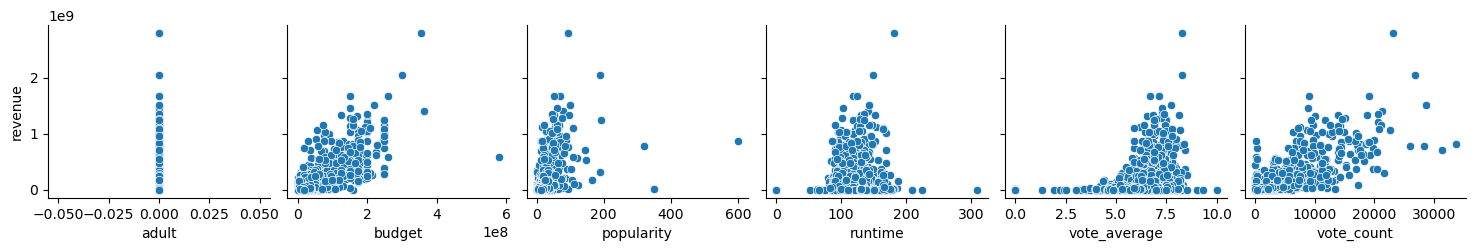

In [71]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[:6])

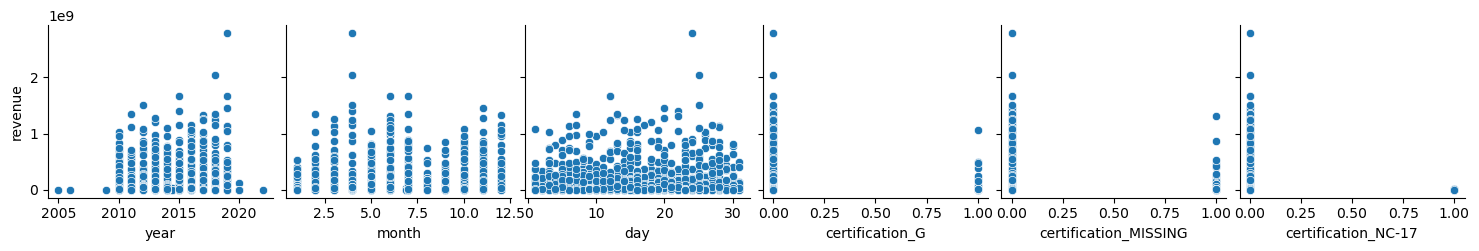

In [72]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[6:12])

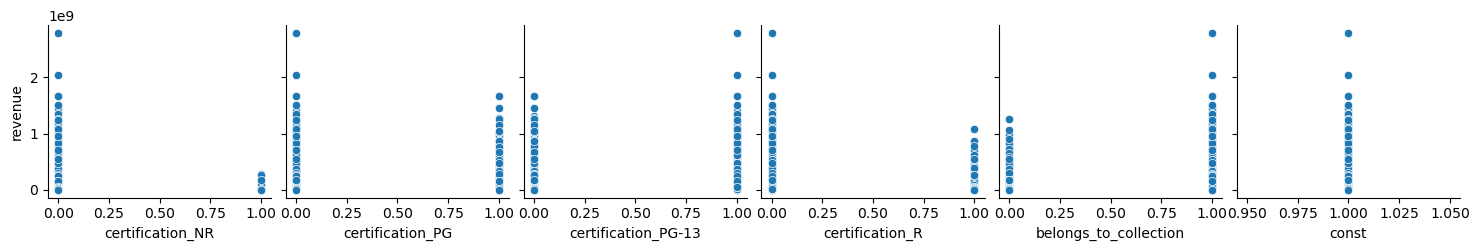

In [73]:
sns.pairplot(data=plot_df, y_vars='revenue',x_vars=plot_cols[12:])

Shouldn't have years before 2000, so drop.
Check outliers in popularity, runtime

In [74]:
# remove movies prior to 2000
df = df.loc[ df['year']>=2000]
df

adult  belongs_to_collection       budget  popularity       revenue  \
4        0.0                  False  260000000.0     108.562  5.924617e+08   
6        0.0                   True   30000000.0      21.896  9.670000e+05   
9        0.0                  False   69000000.0      13.637  8.638786e+07   
10       0.0                  False  110000000.0      31.075  1.772388e+08   
11       0.0                   True  200000000.0      49.445  1.066970e+09   
...      ...                    ...          ...         ...           ...   
37700    0.0                   True    1066375.0       1.400  4.165528e+06   
37706    0.0                  False    8120000.0      16.561  1.246522e+08   
37728    0.0                  False    3500000.0       1.896  1.000000e+07   
37949    0.0                  False   12547000.0       4.748  1.091477e+06   
38089    0.0                  False     632040.0       0.924  4.220000e+04   

       runtime  vote_average  vote_count certification  Genre_Family  \
4        100.0         7.590     10223.0            PG          True   
6         92.0         5.368       600.0             R         False   
9        114.0         5.692      1601.0         PG-13         False   
10       117.0         6.393      4206.0         PG-13         False   
11       103.0         7.792     13435.0             G          True   
...        ...           ...         ...           ...           ...   
37700    140.0         6.000         3.0                       False   
37706    111.0         7.012       215.0                       False   
37728    149.0         4.125         8.0                        True   
37949    116.0         6.800        11.0                       False   
38089    134.0         6.500         2.0                       False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
11                True                  False           False          False   
...                ...                    ...             ...            ...   
37700            False                  False           False          False   
37706            False                  False           False          False   
37728            False                  False           False          False   
37949            False                  False           False          False   
38089            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
11           False          False          True      False        False   
...            ...            ...           ...        ...          ...   
37700         True          False         False      False        False   
37706        False          False          True      False         True   
37728         True          False          True      False        False   
37949         True          False         False      False        False   
38089         True          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False  

Creating a function to perform train test split and turn train and test data into a dataframe.

In [75]:
def get_train_test_split(df_, y_col='revenue',drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    final_drop_cols = []
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse=False))
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )

    preprocessor = make_column_transformer((num_pipe, num_cols),
                                           (cat_pipe,cat_cols),remainder='passthrough')
    
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    ## Finding the categorical pipeline in our col transformer.
    preprocessor.named_transformers_['pipeline-2']

    ## B) Using list-slicing to find the encoder 
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


    ## Create the empty list
    final_features = [*cat_features,*num_cols,*already_ohe_cols]

    ## Make df verisons of x data
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=final_features, index=X_train.index)


    X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                             columns=final_features, index=X_test.index)


    ### Adding a Constant for Statsmodels
    ## Make final X_train_df and X_test_df with constants added
    X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
    X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
    return X_train_df, y_train, X_test_df, y_test

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     90.54
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:06:15   Log-Likelihood:                -41723.
No. Observations:                2106   AIC:                         8.361e+04
Df Residuals:                    2023   BIC:                         8.408e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_                      1093.1450    369.441      2.959      0.003     368.620    1817.670
certification_G                        2.0011      0.078     25.701      0.000       1.848       2.154
certification_NC-17                -4262.4030   1.22e+05     -0.035      0.972   -2.43e+05    2.34e+05
certification_NR                    2.349e+05   1.25e+05      1.880      0.060   -1.01e+04     4.8e+05
certification_PG                   -1.812e+06   2.08e+06     -0.872      0.383   -5.89e+06    2.26e+06
certification_PG-13                 2.696e+04    914.980     29.468      0.000    2.52e+04    2.88e+04
certification_R                     2.456e+06   8.35e+05      2.942      0.003    8.19e+05    4.09e+06
adult                              -4.004e+05    6.5e+05     -0.616      0.538   -1.68e+06    8.75e+05
budget                             -5.204e+04   2.61e+05     -0.200      0.842   -5.63e+05    4.59e+05
popularity                         -6.194e+08   2.11e+08     -2.938      0.003   -1.03e+09   -2.06e+08
runtime                            -6.062e+08   2.11e+08     -2.869      0.004   -1.02e+09   -1.92e+08
vote_average                       -6.306e+08   2.14e+08     -2.952      0.003   -1.05e+09   -2.12e+08
vote_count                         -6.173e+08   2.11e+08     -2.932      0.003   -1.03e+09   -2.04e+08
year                               -6.141e+08    2.1e+08     -2.919      0.004   -1.03e+09   -2.02e+08
month                               -6.22e+08    2.1e+08     -2.962      0.003   -1.03e+09    -2.1e+08
day                                -6.446e+08    2.1e+08     -3.068      0.002   -1.06e+09   -2.33e+08
belongs_to_collection               6.507e+07   6.01e+06     10.821      0.000    5.33e+07    7.69e+07
Genre_Family                       -3.593e+06   1.09e+07     -0.330      0.742    -2.5e+07    1.78e+07
Genre_Animation                     3.345e+07   1.19e+07      2.822      0.005    1.02e+07    5.67e+07
Genre_Science Fiction              -2.217e+07   8.62e+06     -2.571      0.010   -3.91e+07   -5.26e+06
Genre_Thriller                     -1.129e+06   6.19e+06     -0.182      0.855   -1.33e+07     1.1e+07
Genre_Mystery                      -1.755e+07   8.98e+06     -1.954      0.051   -3.52e+07    6.53e+04
Genre_Drama                        -2.638e+06   5.93e+06     -0.445      0.657   -1.43e+07       9e+06
Genre_Romance                       2.938e+06   6.73e+06      0.437      0.663   -1.03e+07    1.61e+07
Genre_Comedy                        1.431e+06    5.7e+06      0.251      0.802   -9.74e+06    1.26e+07
Genre_War                            3.76e+06   1.16e+07      0.324      0.746    -1.9e+07    2.65e+07
Genre_Crime                        -2.268e+06   7.14e+06     -0.318      0.751   -1.63e+07    1.

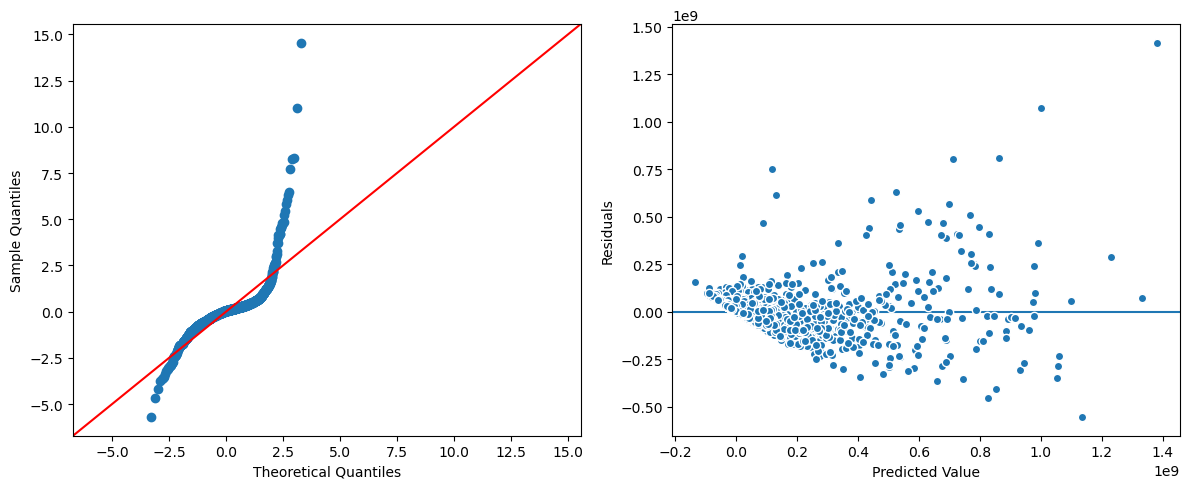

In [76]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

# Removing Outliers

In [77]:

from scipy import stats
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [78]:
## save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers = {}
for col in outlier_cols:
    outliers_col = find_outliers(df[col])
    outliers[col] = outliers_col

- 26 outliers found in runtime using Z-Scores.
- 27 outliers found in popularity using Z-Scores.
- 78 outliers found in revenue using Z-Scores.


In [79]:
# Make new df_clean copy of df
df_clean = df.copy()

## loop through dictionary to remove outliers
for col, idx_outliers in outliers.items():
    df_clean = df_clean[~idx_outliers]
df_clean

C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\1890287056.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[~idx_outliers]


adult  belongs_to_collection       budget  popularity      revenue  \
6        0.0                   True   30000000.0      21.896     967000.0   
9        0.0                  False   69000000.0      13.637   86387857.0   
10       0.0                  False  110000000.0      31.075  177238796.0   
14       0.0                  False   85000000.0      30.251   48000000.0   
17       0.0                  False   20000000.0      15.820   54956140.0   
...      ...                    ...          ...         ...          ...   
37700    0.0                   True    1066375.0       1.400    4165528.0   
37706    0.0                  False    8120000.0      16.561  124652206.0   
37728    0.0                  False    3500000.0       1.896   10000000.0   
37949    0.0                  False   12547000.0       4.748    1091477.0   
38089    0.0                  False     632040.0       0.924      42200.0   

       runtime  vote_average  vote_count certification  Genre_Family  \
6         92.0         5.368       600.0             R         False   
9        114.0         5.692      1601.0         PG-13         False   
10       117.0         6.393      4206.0         PG-13         False   
14       112.0         7.462      6950.0         PG-13         False   
17       101.0         6.228      1798.0             R         False   
...        ...           ...         ...           ...           ...   
37700    140.0         6.000         3.0                       False   
37706    111.0         7.012       215.0                       False   
37728    149.0         4.125         8.0                        True   
37949    116.0         6.800        11.0                       False   
38089    134.0         6.500         2.0                       False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
14               False                  False           False          False   
17               False                  False           False           True   
...                ...                    ...             ...            ...   
37700            False                  False           False          False   
37706            False                  False           False          False   
37728            False                  False           False          False   
37949            False                  False           False          False   
38089            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
14           False           True          True      False        False   
17           False          False         False      False        False   
...            ...            ...           ...        ...          ...   
37700         True          False         False      False        False   
37706        False          False          True      False         True   
37728         True          False          True      False        False   
37949         True          False         False      False        False   
38089         True          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False   
14             True            False         False          False   
17        

# Model 3: Outliers Removed (Z_scores)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     102.8
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:07:05   Log-Likelihood:                -38728.
No. Observations:                2019   AIC:                         7.762e+04
Df Residuals:                    1936   BIC:                         7.809e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_                        88.4273     84.146      1.051      0.293     -76.599     253.454
certification_G                        1.3155      0.047     28.045      0.000       1.224       1.408
certification_NC-17                 3.311e+05   1.52e+05      2.173      0.030    3.22e+04     6.3e+05
certification_NR                    1.712e+05   7.44e+04      2.302      0.021    2.54e+04    3.17e+05
certification_PG                   -7.962e+05   1.13e+06     -0.707      0.480      -3e+06    1.41e+06
certification_PG-13                 1.966e+04    659.461     29.814      0.000    1.84e+04     2.1e+04
certification_R                    -4.803e+05   4.48e+05     -1.073      0.283   -1.36e+06    3.98e+05
adult                              -3.956e+05   3.62e+05     -1.093      0.274   -1.11e+06    3.14e+05
budget                              1.654e+04   1.41e+05      0.117      0.907    -2.6e+05    2.93e+05
popularity                          1.217e+08   1.13e+08      1.077      0.282   -9.99e+07    3.43e+08
runtime                             1.252e+08   1.13e+08      1.107      0.269   -9.66e+07    3.47e+08
vote_average                        1.097e+08   1.15e+08      0.953      0.341   -1.16e+08    3.35e+08
vote_count                          1.246e+08   1.13e+08      1.105      0.269   -9.65e+07    3.46e+08
year                                1.276e+08   1.13e+08      1.133      0.257   -9.32e+07    3.48e+08
month                               1.177e+08   1.13e+08      1.045      0.296   -1.03e+08    3.39e+08
day                                 1.015e+08   1.13e+08      0.901      0.368   -1.19e+08    3.22e+08
belongs_to_collection               3.853e+07   3.29e+06     11.699      0.000    3.21e+07     4.5e+07
Genre_Family                        2.897e+06   6.12e+06      0.473      0.636   -9.11e+06    1.49e+07
Genre_Animation                     1.099e+07    6.8e+06      1.616      0.106   -2.35e+06    2.43e+07
Genre_Science Fiction              -2.396e+07    4.8e+06     -4.992      0.000   -3.34e+07   -1.45e+07
Genre_Thriller                      1.788e+06   3.32e+06      0.539      0.590   -4.72e+06     8.3e+06
Genre_Mystery                      -1.042e+07   4.83e+06     -2.159      0.031   -1.99e+07   -9.55e+05
Genre_Drama                        -3.811e+06   3.19e+06     -1.195      0.232   -1.01e+07    2.44e+06
Genre_Romance                       2.697e+06   3.57e+06      0.757      0.449   -4.29e+06    9.69e+06
Genre_Comedy                        3.965e+06   3.12e+06      1.271      0.204   -2.15e+06    1.01e+07
Genre_War                          -2.904e+06   6.48e+06     -0.448      0.654   -1.56e+07    9.81e+06
Genre_Crime                        -5.129e+06   3.84e+06     -1.336      0.182   -1.27e+07     2

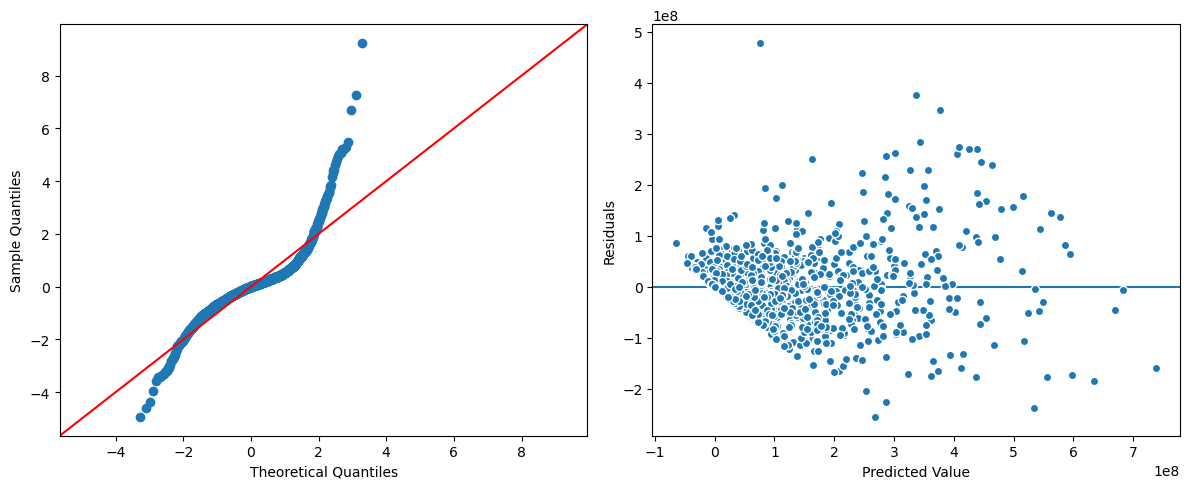

In [80]:
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

# Removing Outliers - Using IQR Rule

<AxesSubplot: xlabel='revenue'>

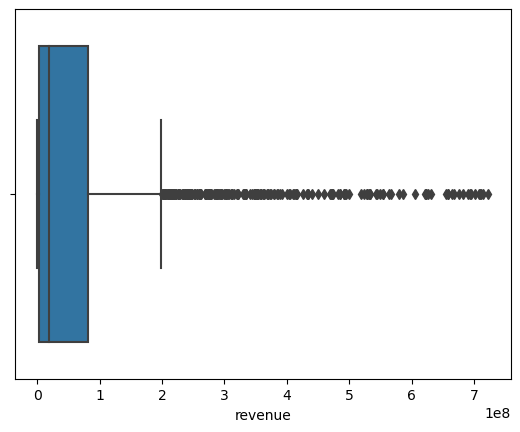

In [81]:
sns.boxplot(x = y_train)

In [82]:
def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers

In [83]:
outliers_z = find_outliers(df['revenue'])
outliers_z

- 78 outliers found in revenue using Z-Scores.


4        False
6        False
9        False
10       False
11        True
         ...  
37700    False
37706    False
37728    False
37949    False
38089    False
Name: revenue, Length: 2809, dtype: bool

In [84]:
outliers_iqr = find_outliers_IQR(df['revenue'])
outliers_iqr

- 343 outliers found in revenue using IQR.


4         True
6        False
9        False
10       False
11        True
         ...  
37700    False
37706    False
37728    False
37949    False
38089    False
Name: revenue, Length: 2809, dtype: bool

In [85]:
## Loop to remove outliers from same columns using new function
outlier_cols = ['runtime','popularity','revenue']

## Empty dict for both types of outliers
outliers_z = {}
outliers_iqr = {}

## Use both functions to see the comparison for # of outliers
for col in outlier_cols:
    outliers_col_z = find_outliers(df[col])
    outliers_z[col] = outliers_col_z
    
    outliers_col_iqr = find_outliers_IQR(df[col])
    outliers_iqr[col] = outliers_col_iqr
    print()

- 26 outliers found in runtime using Z-Scores.
- 66 outliers found in runtime using IQR.

- 27 outliers found in popularity using Z-Scores.
- 205 outliers found in popularity using IQR.

- 78 outliers found in revenue using Z-Scores.
- 343 outliers found in revenue using IQR.



In [86]:
# remove_outliers using z-score
df_clean_z = df.copy()
for col, idx_outliers in outliers_z.items():
    df_clean_z = df_clean_z[~idx_outliers]
df_clean_z

C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\1280488670.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_z = df_clean_z[~idx_outliers]


adult  belongs_to_collection       budget  popularity      revenue  \
6        0.0                   True   30000000.0      21.896     967000.0   
9        0.0                  False   69000000.0      13.637   86387857.0   
10       0.0                  False  110000000.0      31.075  177238796.0   
14       0.0                  False   85000000.0      30.251   48000000.0   
17       0.0                  False   20000000.0      15.820   54956140.0   
...      ...                    ...          ...         ...          ...   
37700    0.0                   True    1066375.0       1.400    4165528.0   
37706    0.0                  False    8120000.0      16.561  124652206.0   
37728    0.0                  False    3500000.0       1.896   10000000.0   
37949    0.0                  False   12547000.0       4.748    1091477.0   
38089    0.0                  False     632040.0       0.924      42200.0   

       runtime  vote_average  vote_count certification  Genre_Family  \
6         92.0         5.368       600.0             R         False   
9        114.0         5.692      1601.0         PG-13         False   
10       117.0         6.393      4206.0         PG-13         False   
14       112.0         7.462      6950.0         PG-13         False   
17       101.0         6.228      1798.0             R         False   
...        ...           ...         ...           ...           ...   
37700    140.0         6.000         3.0                       False   
37706    111.0         7.012       215.0                       False   
37728    149.0         4.125         8.0                        True   
37949    116.0         6.800        11.0                       False   
38089    134.0         6.500         2.0                       False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
14               False                  False           False          False   
17               False                  False           False           True   
...                ...                    ...             ...            ...   
37700            False                  False           False          False   
37706            False                  False           False          False   
37728            False                  False           False          False   
37949            False                  False           False          False   
38089            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
14           False           True          True      False        False   
17           False          False         False      False        False   
...            ...            ...           ...        ...          ...   
37700         True          False         False      False        False   
37706        False          False          True      False         True   
37728         True          False          True      False        False   
37949         True          False         False      False        False   
38089         True          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False   
14             True            False         False          False   
17        

In [87]:
# remove_outliers using iqr
df_clean_iqr = df.copy()
for col, idx_outliers in outliers_iqr.items():
    df_clean_iqr = df_clean_iqr[~idx_outliers]
df_clean_iqr

C:\Users\Joene\AppData\Local\Temp\ipykernel_19204\3541058093.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_iqr = df_clean_iqr[~idx_outliers]


adult  belongs_to_collection       budget  popularity      revenue  \
6        0.0                   True   30000000.0      21.896     967000.0   
9        0.0                  False   69000000.0      13.637   86387857.0   
10       0.0                  False  110000000.0      31.075  177238796.0   
14       0.0                  False   85000000.0      30.251   48000000.0   
17       0.0                  False   20000000.0      15.820   54956140.0   
...      ...                    ...          ...         ...          ...   
37700    0.0                   True    1066375.0       1.400    4165528.0   
37706    0.0                  False    8120000.0      16.561  124652206.0   
37728    0.0                  False    3500000.0       1.896   10000000.0   
37949    0.0                  False   12547000.0       4.748    1091477.0   
38089    0.0                  False     632040.0       0.924      42200.0   

       runtime  vote_average  vote_count certification  Genre_Family  \
6         92.0         5.368       600.0             R         False   
9        114.0         5.692      1601.0         PG-13         False   
10       117.0         6.393      4206.0         PG-13         False   
14       112.0         7.462      6950.0         PG-13         False   
17       101.0         6.228      1798.0             R         False   
...        ...           ...         ...           ...           ...   
37700    140.0         6.000         3.0                       False   
37706    111.0         7.012       215.0                       False   
37728    149.0         4.125         8.0                        True   
37949    116.0         6.800        11.0                       False   
38089    134.0         6.500         2.0                       False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
14               False                  False           False          False   
17               False                  False           False           True   
...                ...                    ...             ...            ...   
37700            False                  False           False          False   
37706            False                  False           False          False   
37728            False                  False           False          False   
37949            False                  False           False          False   
38089            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
14           False           True          True      False        False   
17           False          False         False      False        False   
...            ...            ...           ...        ...          ...   
37700         True          False         False      False        False   
37706        False          False          True      False         True   
37728         True          False          True      False        False   
37949         True          False         False      False        False   
38089         True          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False   
14             True            False         False          False   
17        

# Model 4 - IQR Outliers Removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     45.56
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        15:08:22   Log-Likelihood:                -32923.
No. Observations:                1773   AIC:                         6.601e+04
Df Residuals:                    1690   BIC:                         6.647e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_                       -46.1186     29.893     -1.543      0.123    -104.750      12.512
certification_G                        0.7195      0.044     16.365      0.000       0.633       0.806
certification_NC-17                 5.903e+05   1.34e+05      4.420      0.000    3.28e+05    8.52e+05
certification_NR                     1.39e+05   4.43e+04      3.135      0.002     5.2e+04    2.26e+05
certification_PG                    2.886e+05   6.08e+05      0.475      0.635   -9.03e+05    1.48e+06
certification_PG-13                 1.098e+04    636.910     17.235      0.000    9727.734    1.22e+04
certification_R                    -4.156e+05   2.65e+05     -1.570      0.117   -9.35e+05    1.04e+05
adult                               3.848e+04   2.08e+05      0.185      0.853   -3.69e+05    4.46e+05
budget                             -7.324e+04    8.3e+04     -0.882      0.378   -2.36e+05    8.96e+04
popularity                          9.996e+07   6.69e+07      1.495      0.135   -3.12e+07    2.31e+08
runtime                             1.157e+08    6.7e+07      1.727      0.084   -1.57e+07    2.47e+08
vote_average                         1.01e+08   6.81e+07      1.483      0.138   -3.25e+07    2.34e+08
vote_count                          1.004e+08   6.66e+07      1.508      0.132   -3.02e+07    2.31e+08
year                                1.094e+08   6.67e+07      1.641      0.101   -2.13e+07     2.4e+08
month                               1.028e+08   6.66e+07      1.544      0.123   -2.78e+07    2.33e+08
day                                 9.047e+07   6.65e+07      1.359      0.174   -4.01e+07    2.21e+08
belongs_to_collection               1.936e+07   2.03e+06      9.533      0.000    1.54e+07    2.33e+07
Genre_Family                       -3.295e+06   3.57e+06     -0.923      0.356   -1.03e+07    3.71e+06
Genre_Animation                     2.999e+06   3.98e+06      0.755      0.451    -4.8e+06    1.08e+07
Genre_Science Fiction              -1.392e+07   2.86e+06     -4.874      0.000   -1.95e+07   -8.32e+06
Genre_Thriller                     -2.977e+06   1.93e+06     -1.546      0.122   -6.75e+06    7.99e+05
Genre_Mystery                      -4.171e+05   2.81e+06     -0.148      0.882   -5.93e+06     5.1e+06
Genre_Drama                        -3.436e+06   1.83e+06     -1.881      0.060   -7.02e+06    1.47e+05
Genre_Romance                       -2.13e+06   2.05e+06     -1.038      0.300   -6.16e+06     1.9e+06
Genre_Comedy                        7.588e+06   1.78e+06      4.270      0.000     4.1e+06    1.11e+07
Genre_War                            1.16e+06    3.7e+06      0.313      0.754    -6.1e+06    8.42e+06
Genre_Crime                        -3.258e+06   2.22e+06     -1.467      0.143   -7.61e+06     1

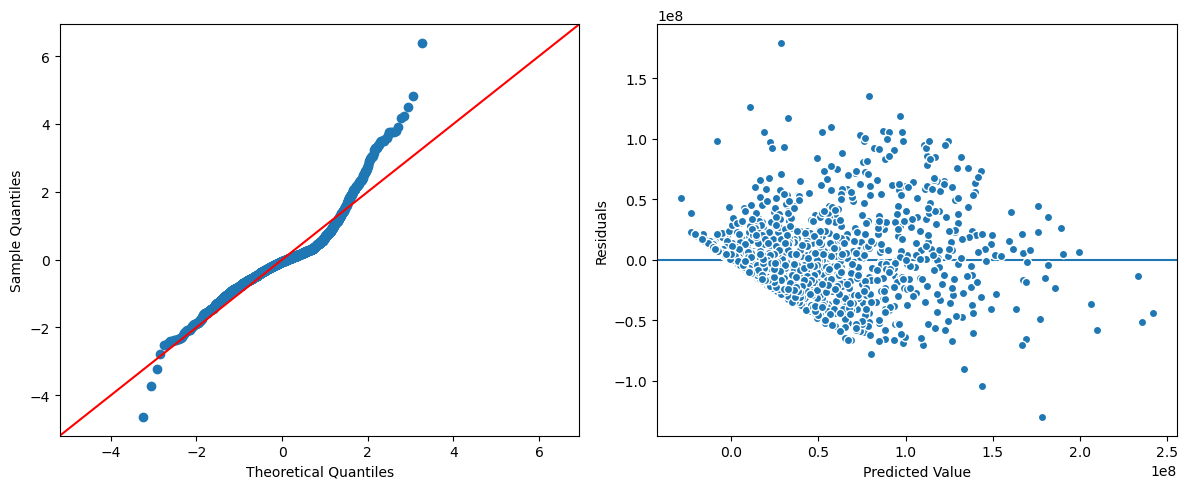

In [88]:
## MAKE NEW MODEL WITH IQR OUTLIERS REMOVED

X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean_iqr)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [89]:
## get pvalues from model result
pvals = result.pvalues 
pvals

certification_                        1.230673e-01
certification_G                       5.410395e-56
certification_NC-17                   1.049723e-05
certification_NR                      1.747136e-03
certification_PG                      6.348803e-01
                                          ...     
ProdComp_Village Roadshow Pictures    9.041697e-01
ProdComp_Walt Disney Pictures         2.006405e-01
ProdComp_Warner Bros. Pictures        4.101120e-02
ProdComp_Working Title Films          1.211659e-02
const                                 1.231778e-01
Length: 87, dtype: float64

In [90]:
## Check for p-values that are >.05
pvals[ pvals>.05]

certification_                        0.123067
certification_PG                      0.634880
certification_R                       0.116570
adult                                 0.853088
budget                                0.377768
                                        ...   
ProdComp_TSG Entertainment            0.491733
ProdComp_The Weinstein Company        0.059298
ProdComp_Village Roadshow Pictures    0.904170
ProdComp_Walt Disney Pictures         0.200640
const                                 0.123178
Length: 63, dtype: float64

# Removing features - based on p-values

In [91]:
## Get list of ALL genre columns to see how many are sig
genre_cols = [c for c in df_clean.columns if c.startswith("Genre")]
genre_cols

['Genre_Family',
 'Genre_Animation',
 'Genre_Science Fiction',
 'Genre_Thriller',
 'Genre_Mystery',
 'Genre_Drama',
 'Genre_Romance',
 'Genre_Comedy',
 'Genre_War',
 'Genre_Crime',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Horror',
 'Genre_Fantasy',
 'Genre_History',
 'Genre_Western',
 'Genre_Music',
 'Genre_Documentary',
 'Genre_TV Movie']

In [92]:
## save just genre pvalues
genre_pvals = pvals[genre_cols] > 0.05
## calc what % are insig?
genre_pvals.value_counts(normalize = True)

True     0.789474
False    0.210526
dtype: float64

In [93]:
## Get list of ALL prod_comp columns to see how many are sig
comp_cols = [c for c in df_clean.columns if c.startswith("ProdComp")]
comp_cols

['ProdComp_20th Century Fox',
 'ProdComp_Annapurna Pictures',
 'ProdComp_Atresmedia',
 'ProdComp_BBC Film',
 'ProdComp_Blumhouse Productions',
 'ProdComp_Canal+',
 'ProdComp_Ciné+',
 'ProdComp_Columbia Pictures',
 'ProdComp_DreamWorks Pictures',
 'ProdComp_Dune Entertainment',
 'ProdComp_EuropaCorp',
 'ProdComp_Film4 Productions',
 'ProdComp_FilmNation Entertainment',
 'ProdComp_Focus Features',
 'ProdComp_Fox 2000 Pictures',
 'ProdComp_Fox Searchlight Pictures',
 'ProdComp_France 2 Cinéma',
 'ProdComp_France 3 Cinéma',
 'ProdComp_Huayi Brothers Pictures',
 'ProdComp_IM Global',
 'ProdComp_Ingenious Media',
 'ProdComp_Legendary Pictures',
 'ProdComp_Lionsgate',
 'ProdComp_MISSING',
 'ProdComp_Mandate International',
 'ProdComp_Metro-Goldwyn-Mayer',
 'ProdComp_Millennium Films',
 'ProdComp_New Line Cinema',
 'ProdComp_Paramount',
 'ProdComp_Participant',
 'ProdComp_Pathé',
 'ProdComp_RatPac Entertainment',
 'ProdComp_Regency Enterprises',
 'ProdComp_Relativity Media',
 'ProdComp_Relianc

In [94]:
## save just genre pvalues
comp_pvals = pvals[comp_cols] > 0.05
comp_pvals.value_counts(normalize = True)

True     0.7
False    0.3
dtype: float64

In [95]:
## what pvals are remaining?
other_pvals = pvals.drop([*comp_cols, *genre_cols])
other_pvals[other_pvals>.05]

certification_      0.123067
certification_PG    0.634880
certification_R     0.116570
adult               0.853088
budget              0.377768
popularity          0.135168
runtime             0.084262
vote_average        0.138182
vote_count          0.131748
year                0.100890
month               0.122688
day                 0.174190
const               0.123178
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     35.01
Date:                Sun, 21 May 2023   Prob (F-statistic):          2.01e-301
Time:                        15:09:23   Log-Likelihood:                -33052.
No. Observations:                1773   AIC:                         6.627e+04
Df Residuals:                    1691   BIC:                         6.672e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_                      8.199e+05    1.4e+05      5.842      0.000    5.45e+05     1.1e+06
certification_G                     2.804e+05   4.68e+04      5.992      0.000    1.89e+05    3.72e+05
certification_NC-17                -9.894e+05   6.59e+05     -1.501      0.134   -2.28e+06    3.03e+05
certification_NR                    1.327e+04    672.649     19.727      0.000     1.2e+04    1.46e+04
certification_PG                   -6.478e+05   2.81e+05     -2.307      0.021    -1.2e+06    -9.7e+04
certification_PG-13                 3.281e+05   2.23e+05      1.471      0.142   -1.09e+05    7.66e+05
certification_R                     2187.3516   8.99e+04      0.024      0.981   -1.74e+05    1.79e+05
popularity                          1.553e+08    7.1e+07      2.187      0.029     1.6e+07    2.95e+08
runtime                             1.723e+08    7.1e+07      2.426      0.015     3.3e+07    3.12e+08
vote_average                        1.454e+08   7.19e+07      2.024      0.043    4.47e+06    2.86e+08
vote_count                          1.574e+08   7.07e+07      2.227      0.026    1.87e+07    2.96e+08
year                                1.787e+08   7.07e+07      2.529      0.012    4.01e+07    3.17e+08
month                               1.661e+08   7.07e+07      2.351      0.019    2.75e+07    3.05e+08
day                                 1.458e+08   7.06e+07      2.064      0.039    7.28e+06    2.84e+08
belongs_to_collection               1.845e+07   2.21e+06      8.348      0.000    1.41e+07    2.28e+07
Genre_Family                        -4.05e+06   3.74e+06     -1.082      0.279   -1.14e+07    3.29e+06
Genre_Animation                     3.513e+06   4.38e+06      0.803      0.422   -5.07e+06    1.21e+07
Genre_Science Fiction              -1.286e+07   3.08e+06     -4.174      0.000   -1.89e+07   -6.82e+06
Genre_Thriller                       3.27e+06   2.08e+06      1.569      0.117   -8.18e+05    7.36e+06
Genre_Mystery                      -6.845e+06   3.03e+06     -2.255      0.024   -1.28e+07   -8.92e+05
Genre_Drama                        -5.231e+06   1.95e+06     -2.677      0.007   -9.06e+06    -1.4e+06
Genre_Romance                      -3.877e+06   2.16e+06     -1.797      0.073   -8.11e+06    3.55e+05
Genre_Comedy                        8.027e+06   1.92e+06      4.188      0.000    4.27e+06    1.18e+07
Genre_War                           5.953e+06   3.96e+06      1.502      0.133   -1.82e+06    1.37e+07
Genre_Crime                        -1.546e+06   2.38e+06     -0.651      0.515   -6.21e+06    3.12e+06
Genre_Action                        3.409e+06   2.07e+06      1.647      0.100   -6.51e+05    7.47e+06
Genre_Adventure                     4.716e+06   2.62e+06      1.799      0.072   -4.26e+05    9.

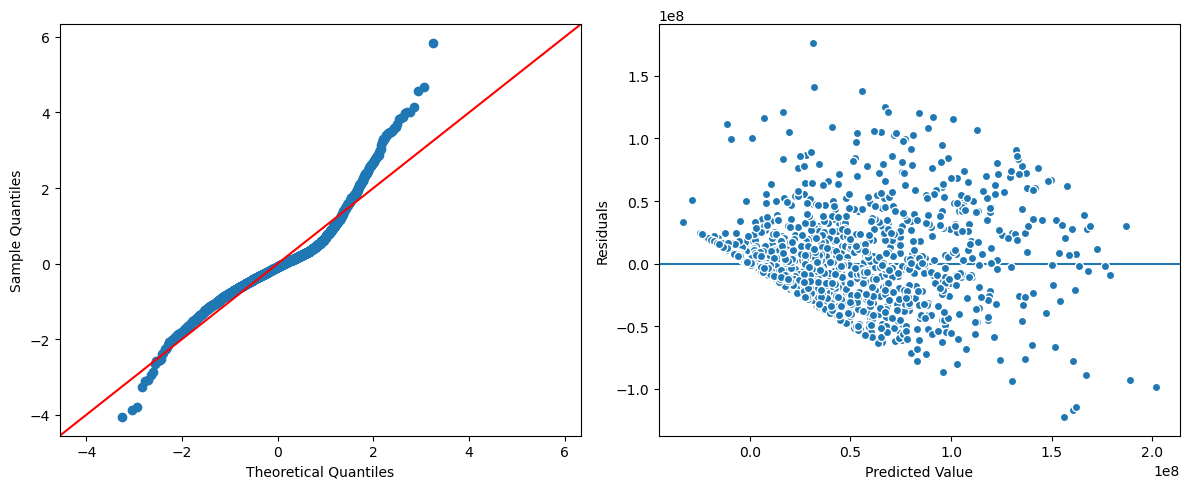

In [96]:
## Make x,y vars, but drop features with bad pvalues
df_clean_iqr = df_clean_iqr.drop(columns=['adult','budget'])
X_train_df, y_train, X_test_df, y_test = \
                                get_train_test_split(df_clean_iqr,)
## MAKE AND EVALUATE OLS
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

# Addressing Multicollinearity

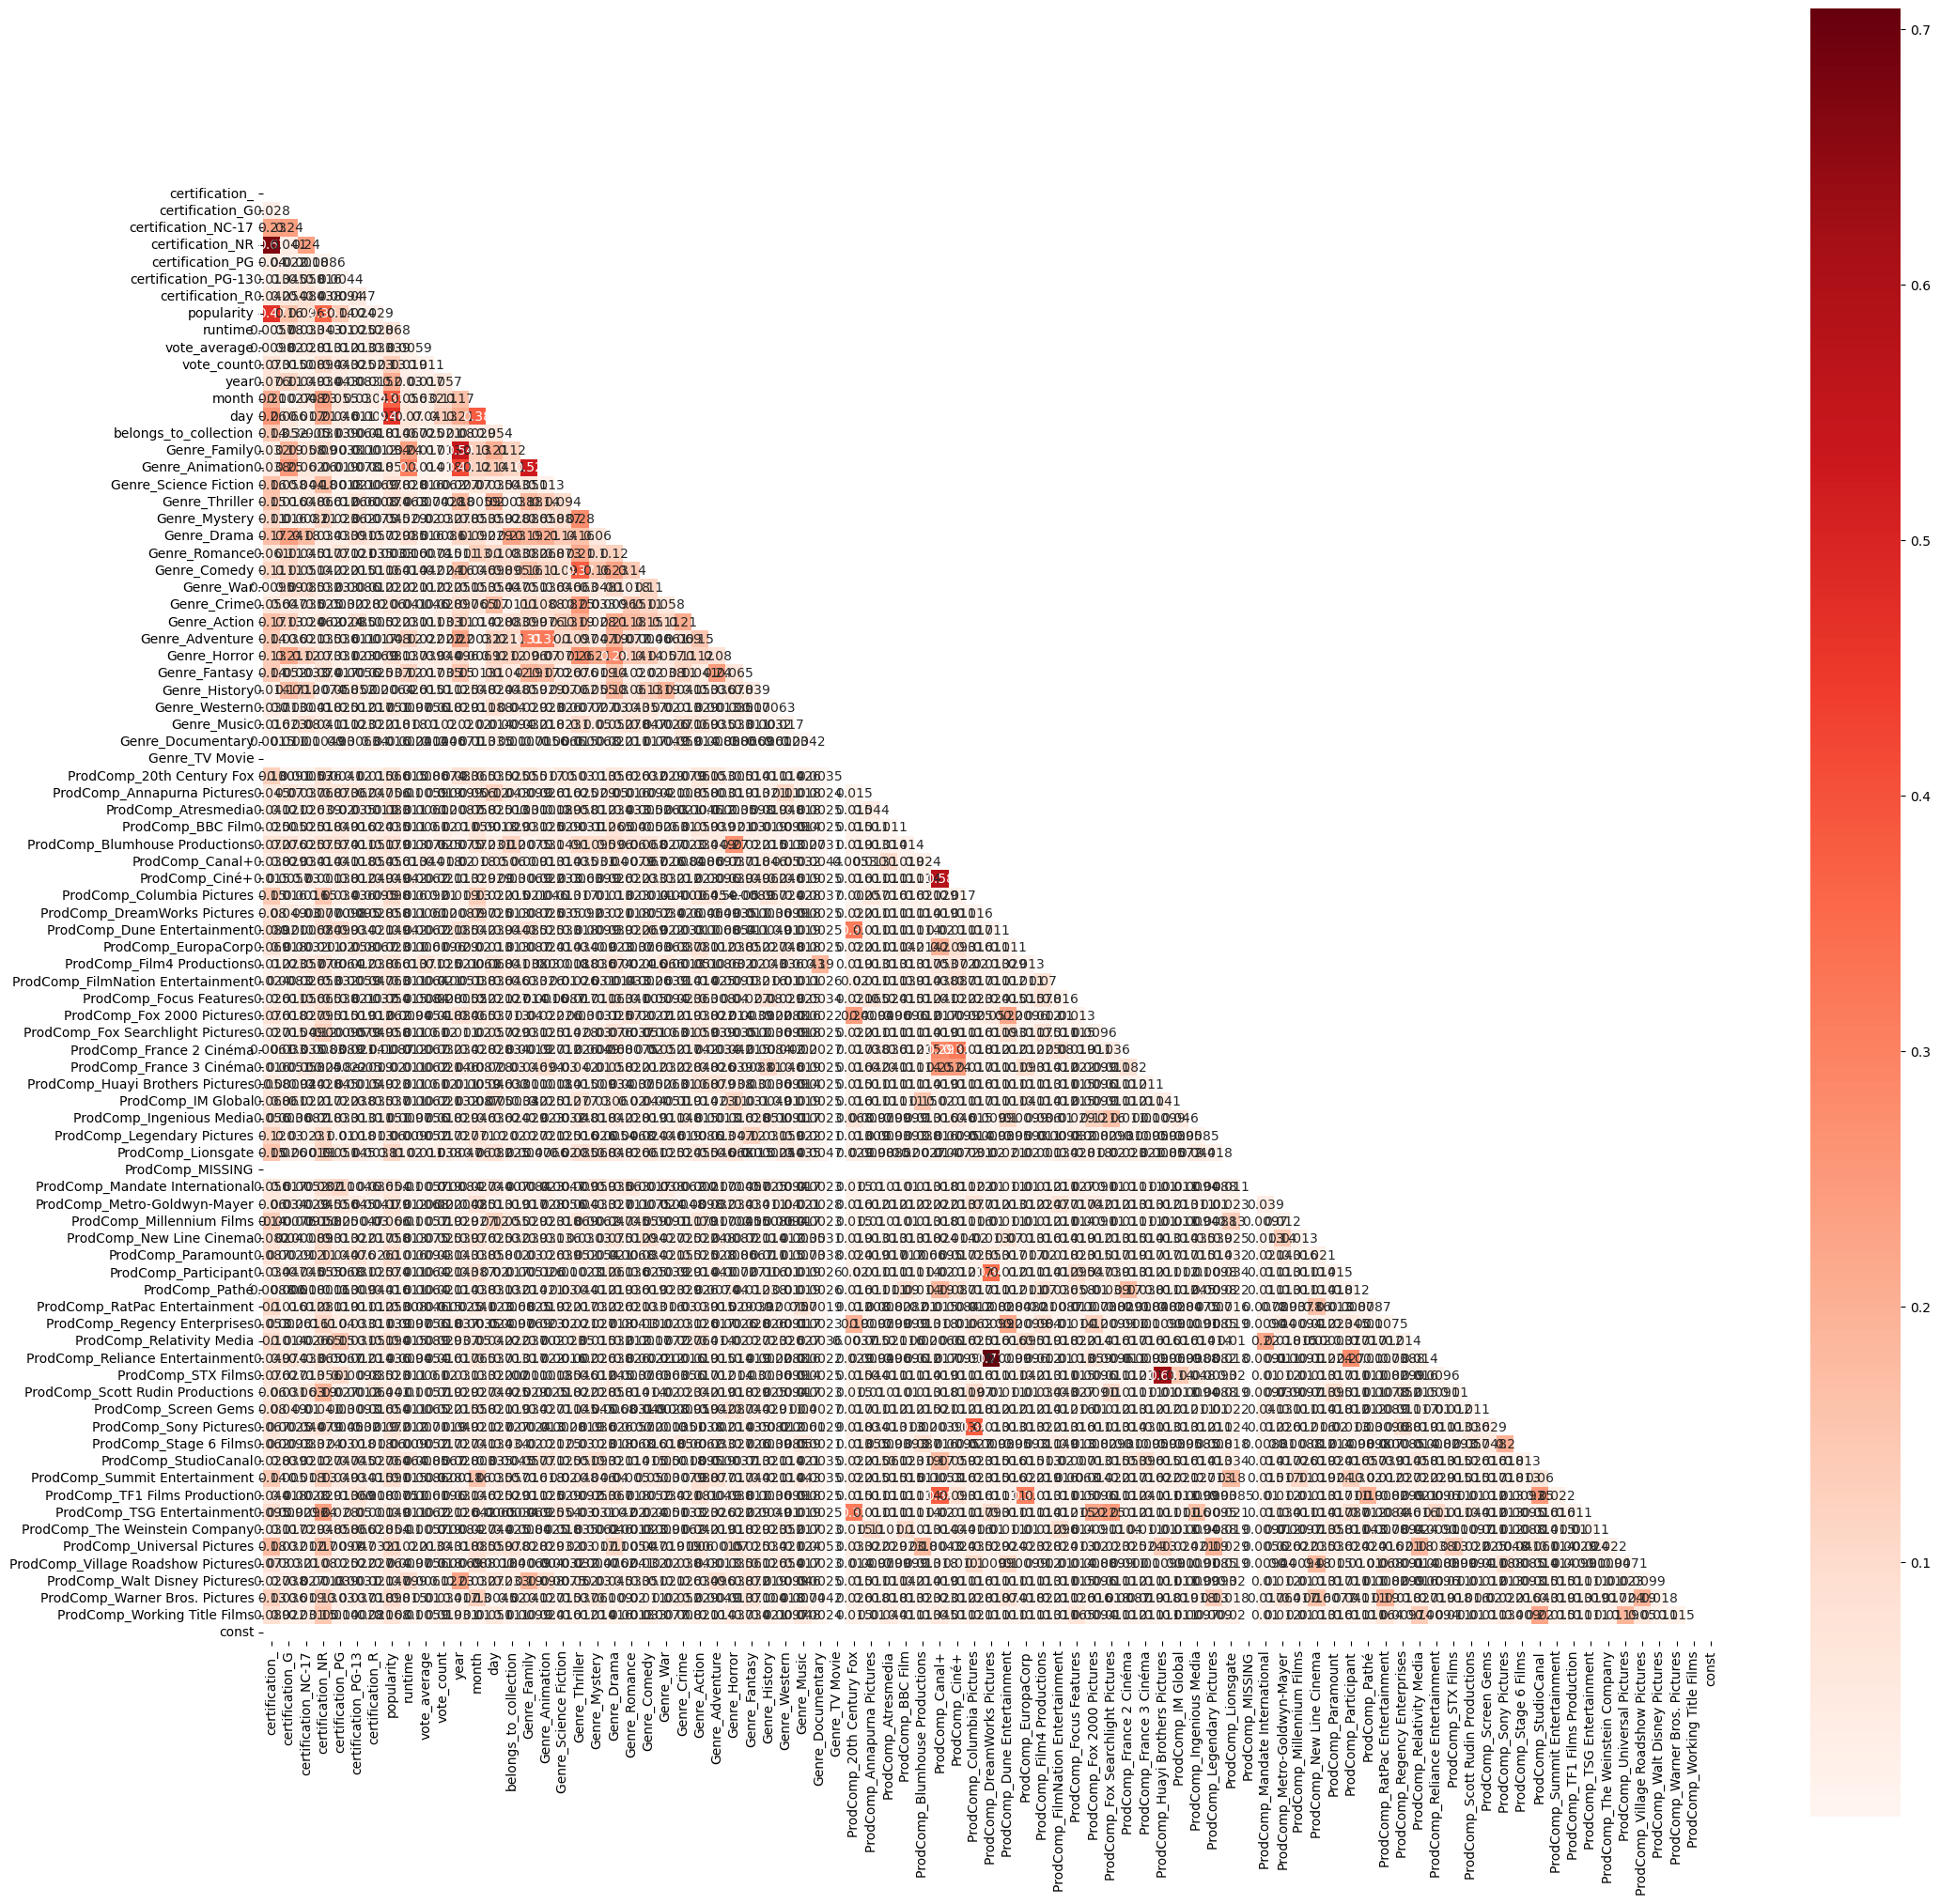

In [97]:
## Calculating the mask to hide the upper-right of the triangle
plt.figure(figsize=(25,25))
corr = X_train_df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

# Variance Inflation Factor

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

certification_  certification_G  certification_NC-17  certification_NR  \
22204        3.647822         2.376199             1.151514       5227.238015   
9805        -1.464178       -18.623801            -0.831486       1593.238015   
16402       -3.318178       -25.623801            -0.926486       -814.761985   
158         -4.938178       -24.623801             0.358514      -1092.761985   
19384      -11.083178        37.376199             1.462514      -1226.761985   
...               ...              ...                  ...               ...   
21931       -2.710178        24.376199             0.713514       -856.761985   
3092         9.363822        -1.623801            -0.741486       -160.761985   
140          2.776822       -11.623801            -0.062486        -19.761985   
9048         7.004822         0.376199             0.551514       3586.238015   
317         -2.198178       -20.623801            -0.339486       -793.761985   

       certification_PG  certification_PG-13  certification_R  popularity  \
22204          1.605753             3.101523         5.670051   -0.312465   
9805          -1.394247            -0.898477        -3.329949   -0.312465   
16402          0.605753            -4.898477        -3.329949   -0.312465   
158           -4.394247             1.101523        10.670051   -0.312465   
19384          0.605753            -0.898477        10.670051    0.687535   
...                 ...                  ...              ...         ...   
21931          1.605753             5.101523       -13.329949   -0.312465   
3092          -3.394247            -4.898477         0.670051   -0.312465   
140           -4.394247            -4.898477        -0.329949   -0.312465   
9048          -1.394247             0.101523         2.670051   -0.312465   
317           -4.394247             2.101523         1.670051   -0.312465   

        runtime  vote_average  vote_count      year     month       day  \
22204 -0.010152     -0.003384   -0.035533 -0.082346 -0.234631  0.678511   
9805  -0.010152     -0.003384   -0.035533 -0.082346 -0.234631  0.678511   
16402 -0.010152     -0.003384   -0.035533 -0.082346 -0.234631  0.678511   
158   -0.010152     -0.003384   -0.035533 -0.082346 -0.234631  0.678511   
19384 -0.010152     -0.003384   -0.035533 -0.082346 -0.234631 -0.321489   
...         ...           ...         ...       ...       ...       ...   
21931 -0.010152     -0.003384   -0.035533 -0.082346  0.765369 -0.321489   
3092  -0.010152     -0.003384   -0.035533 -0.082346  0.765369 -0.321489   
140   -0.010152     -0.003384   -0.035533 -0.082346 -0.234631  0.678511   
9048  -0.010152     -0.003384   -0.035533 -0.082346 -0.234631  0.678511   
317   -0.010152     -0.003384   -0.035533  0.917654 -0.234631 -0.321489   

       belongs_to_collection  Genre_Family  Genre_Animation  \
22204              -0.151156     -0.082346        -0.053017   
9805               -0.151156     -0.082346        -0.053017   
16402              -0.151156     -0.082346        -0.053017   
158                -0.151156     -0.082346        -0.053017   
19384              -0.151156     -0.082346        -0.053017   
...                      ...           ...              ...   
21931              -0.151156     -0.082346        -0.053017   
3092                0.848844     -0.082346        -0.053017   
140                -0.151156     -0.082346        -0.053017   
9048               -0.151156     -0.082346        -0.053017   
317                 0.848844      0.917654         0.946983   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
22204              -0.071066       -0.276368      -0.075578     0.469825   
9805               -0.071066       -0.276368      -0.075578     0.469825   
16402              -0.071066        0.723632      -0.075578    -0.530175   
158                -0.071066       -0.276368      -0.075578     0.469825   
19384               0.928934        0.723632      -0.075578    -0.53017

In [99]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new series to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

C:\Users\Joene\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Joene\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


certification_                        2.698446
certification_G                       1.364615
certification_NC-17                   1.280182
certification_NR                      2.452257
certification_PG                      1.182891
                                        ...   
ProdComp_Village Roadshow Pictures    1.132146
ProdComp_Walt Disney Pictures         1.102252
ProdComp_Warner Bros. Pictures        1.193972
ProdComp_Working Title Films          1.177692
const                                      NaN
Length: 85, dtype: float64

In [100]:
## Sort VIF for inspect
VIF.sort_values()

Genre_Documentary       1.048932
ProdComp_BBC Film       1.052737
ProdComp_Screen Gems    1.056895
Genre_Western           1.063149
ProdComp_Atresmedia     1.063545
                          ...   
runtime                      inf
popularity                   inf
Genre_TV Movie               NaN
ProdComp_MISSING             NaN
const                        NaN
Length: 85, dtype: float64

In [101]:

## Set float format to view vals not in scientfic notation
pd.set_option('display.float_format',lambda x: f'{x:.2f}')

In [102]:
## remove infinite values from VIF and sort
VIF = VIF[VIF!=np.inf].sort_values()
VIF

Genre_Documentary      1.05
ProdComp_BBC Film      1.05
ProdComp_Screen Gems   1.06
Genre_Western          1.06
ProdComp_Atresmedia    1.06
                       ... 
certification_NR       2.45
certification_         2.70
Genre_TV Movie          NaN
ProdComp_MISSING        NaN
const                   NaN
Length: 78, dtype: float64

In [103]:
## filter for VIF that are > 5
VIF[VIF>5]

Series([], dtype: float64)

In [104]:
high_vif = VIF[VIF>5].index
high_vif

Index([], dtype='object')

# Final Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     35.38
Date:                Sun, 21 May 2023   Prob (F-statistic):          9.00e-304
Time:                        15:10:59   Log-Likelihood:                -33078.
No. Observations:                1773   AIC:                         6.632e+04
Df Residuals:                    1691   BIC:                         6.677e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_                      1.019e+06   1.42e+05      7.200      0.000    7.41e+05     1.3e+06
certification_G                     2.619e+05    4.9e+04      5.350      0.000    1.66e+05    3.58e+05
certification_NC-17                -1.143e+06   6.76e+05     -1.689      0.091   -2.47e+06    1.84e+05
certification_NR                    1.262e+04    669.928     18.841      0.000    1.13e+04    1.39e+04
certification_PG                   -8.334e+05   2.89e+05     -2.887      0.004    -1.4e+06   -2.67e+05
certification_PG-13                 5.309e+04   2.24e+05      0.237      0.813   -3.87e+05    4.93e+05
certification_R                    -1.549e+05   9.02e+04     -1.718      0.086   -3.32e+05    2.19e+04
popularity                          1.994e+08   7.29e+07      2.736      0.006    5.64e+07    3.42e+08
runtime                             2.151e+08    7.3e+07      2.947      0.003    7.19e+07    3.58e+08
vote_average                        2.169e+08    7.5e+07      2.894      0.004    6.99e+07    3.64e+08
vote_count                          2.032e+08   7.26e+07      2.800      0.005    6.09e+07    3.46e+08
year                                2.197e+08   7.26e+07      3.026      0.003    7.73e+07    3.62e+08
month                               2.102e+08   7.25e+07      2.898      0.004     6.8e+07    3.52e+08
day                                 1.918e+08   7.25e+07      2.645      0.008    4.96e+07    3.34e+08
belongs_to_collection               1.938e+07   2.22e+06      8.722      0.000     1.5e+07    2.37e+07
Genre_Family                       -4.387e+05   3.93e+06     -0.112      0.911   -8.15e+06    7.27e+06
Genre_Animation                     6.026e+06   4.46e+06      1.351      0.177   -2.72e+06    1.48e+07
Genre_Science Fiction              -1.409e+07   3.23e+06     -4.359      0.000   -2.04e+07   -7.75e+06
Genre_Thriller                      1.635e+06   2.14e+06      0.764      0.445   -2.56e+06    5.83e+06
Genre_Mystery                      -2.716e+06   3.11e+06     -0.874      0.382   -8.81e+06    3.38e+06
Genre_Drama                        -5.662e+06   2.03e+06     -2.786      0.005   -9.65e+06   -1.68e+06
Genre_Romance                      -1.397e+06   2.23e+06     -0.625      0.532   -5.78e+06    2.99e+06
Genre_Comedy                          9.2e+06   1.94e+06      4.735      0.000    5.39e+06     1.3e+07
Genre_War                            7.14e+06   3.81e+06      1.874      0.061   -3.31e+05    1.46e+07
Genre_Crime                        -2.233e+06    2.4e+06     -0.932      0.351   -6.93e+06    2.47e+06
Genre_Action                        2.549e+06   2.14e+06      1.189      0.234   -1.65e+06    6.75e+06
Genre_Adventure                     4.764e+06   2.67e+06      1.786      0.074   -4.69e+05      

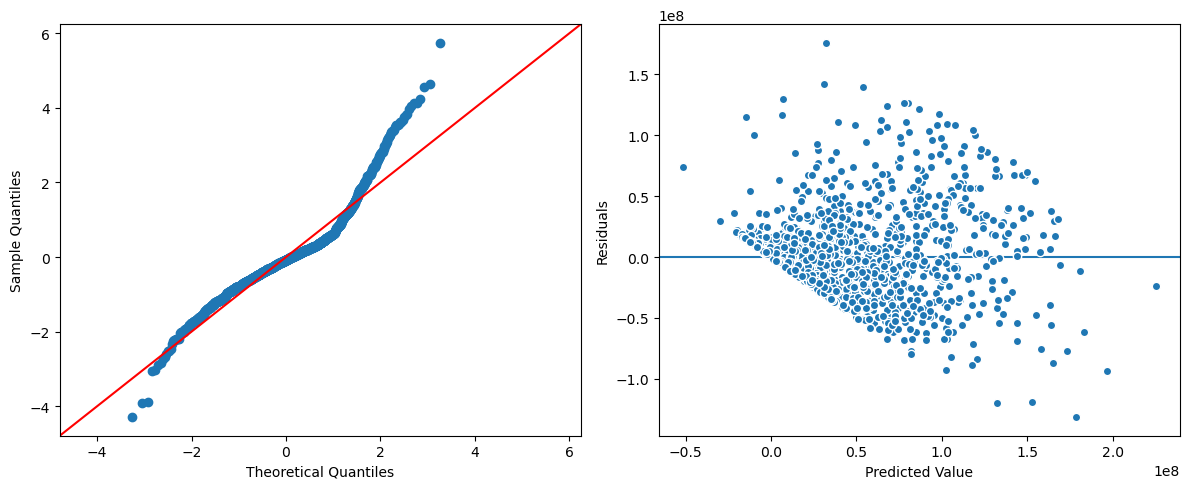

In [105]:
## make new df_final copy of prev df
df_final = df_clean_iqr.drop(columns =high_vif).copy()
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_final)
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result,X_train_df,y_train)

In [106]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.629
Testing R^2: 0.547


# Visualizing Coeffiicents

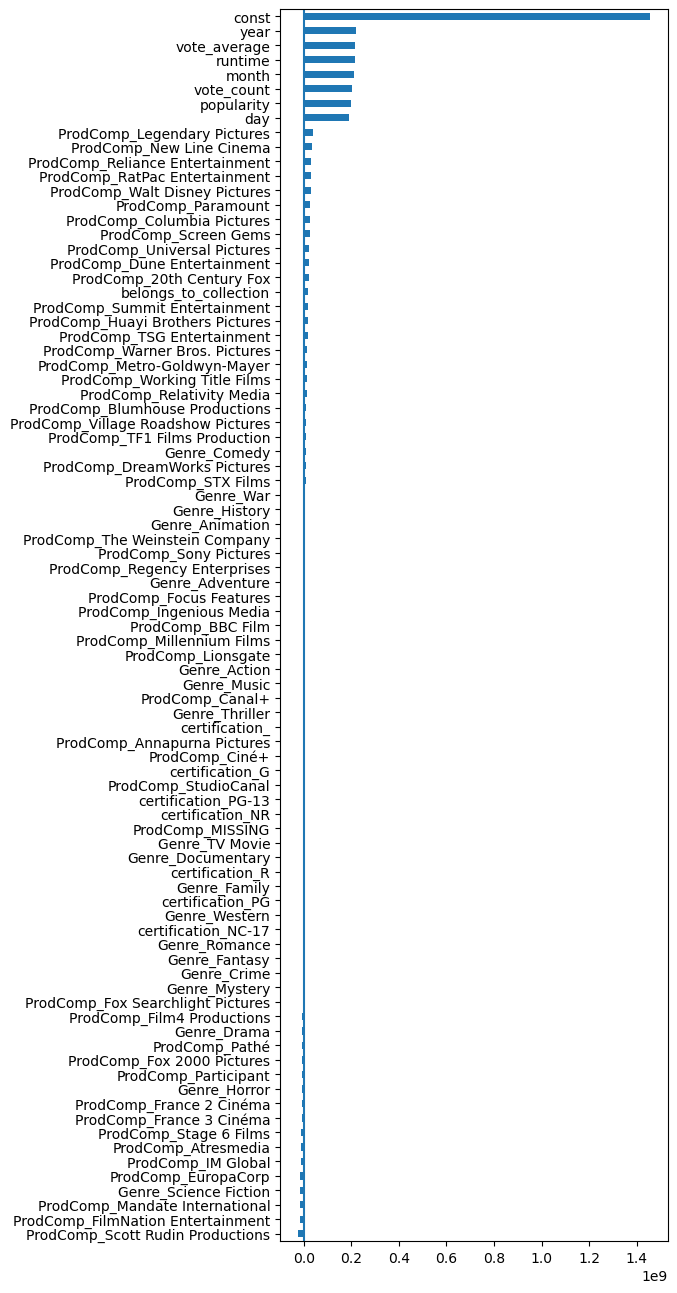

In [107]:
plt.figure(figsize=(5,16))
ax =result.params.sort_values().plot(kind='barh')
ax.axvline()

# Comparing Linear Reg to RandomForest

In [108]:
from sklearn.ensemble import RandomForestRegressor
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_df, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


RandomForestRegressor(random_state=42, verbose=1)

In [109]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = reg.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = reg.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.971
Testing R^2: 0.825


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


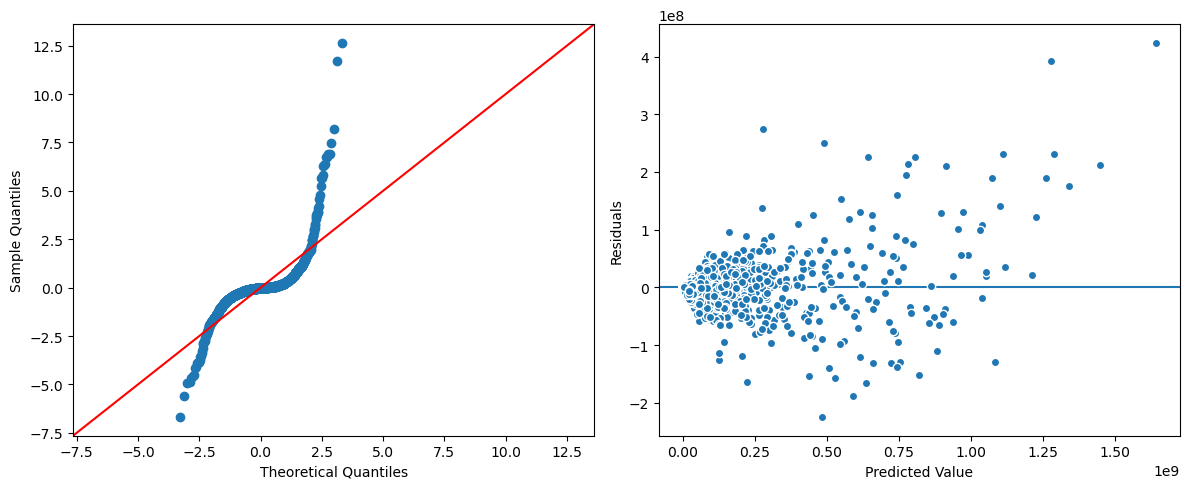

In [110]:
evaluate_ols(reg, X_train_df, y_train)

<AxesSubplot: >

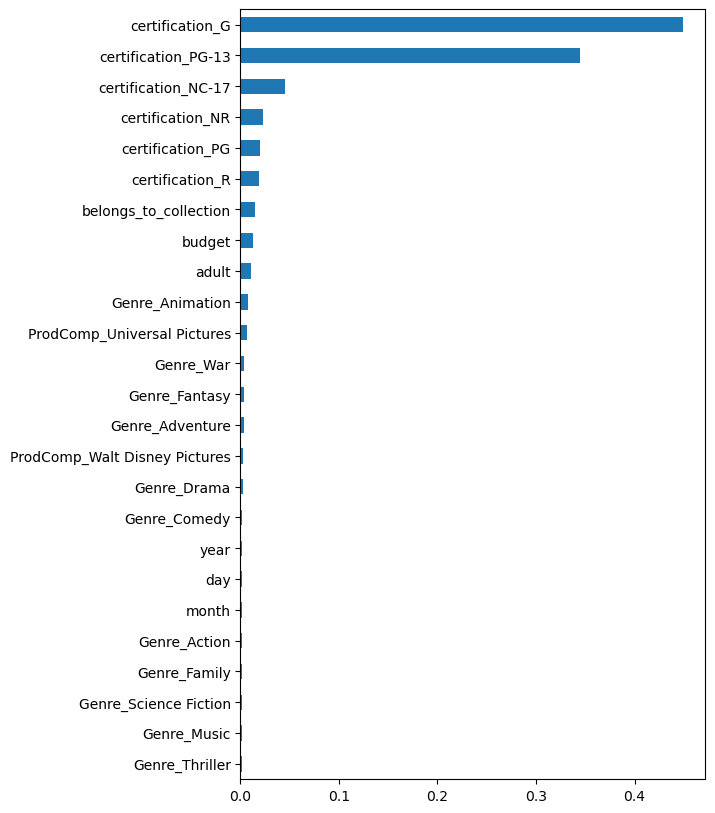

In [111]:
importances = pd.Series(reg.feature_importances_, index=X_train_df.columns)
importances.sort_values().tail(25).plot(kind='barh',figsize=(6,10))